In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run ../config/initialize_nospark.ipynb

from copy import deepcopy
import json
from pprint import pprint
import shutil

In [3]:
sys.path.append('model_pipeline')
from Ensemble import Ensemble

In [4]:
user = !whoami
user = user[0]
ROOT=f'/Users/{user}/Dropbox/data_science/'\
    'modeling-football-outcomes/'
os.chdir(ROOT)

In [5]:
single_model_path = 'model_configs/model__regression_example.json'
single_evaluate_path = 'model_configs/evaluate__regression_examples.json'

In [6]:
pprint(json.load(open(single_model_path)))
pprint(json.load(open(single_evaluate_path)))

{'actions': {'do_evaluate': False,
             'do_score_holdout': False,
             'do_train_and_score_cv': True},
 'dataset_seed': 9,
 'dimensional_dataset_proportions': {'holdout': [{'dim': 'season',
                                                  'from_groups': ['training',
                                                                  'scoring_only'],
                                                  'prop_to_move': 1.0,
                                                  'vals': [2016, 2017]}]},
 'features_list': ['home_field___h_consecutive_home',
                   'home_field___h_home__close_wr_last_4_games',
                   'home_field___h_home__close_wr_last_8_games',
                   'home_field___h_home__close_wr_ytd',
                   'home_field___h_home__open_wr_last_4_games',
                   'home_field___h_home__open_wr_last_8_games',
                   'home_field___h_home__open_wr_ytd',
                   'home_field___h_home__ovr_wr_last_4_games',


## Execute a single model pipeline

In [7]:
from ExecuteModelPipeline import ExecuteModelPipeline
model_pipeline = ExecuteModelPipeline(single_model_path, single_evaluate_path, 'Y')
model_pipeline.execute_model_pipeline()

6
6
6
6
6
6


## Execute an ensemble model pipeline

### Ensemble from existing JSON

#### Ensemble sub-model JSON. Same as above except
* 50% is thrown away for each model (boostrapping)
* don't save CV data

In [8]:
ensemble_submodel_model = 'model_configs/ensemble_submodel_model__regression_example.json'
ensemble_submodel_evaluate = 'model_configs/ensemble_submodel_evaluate__regression_example.json'

pprint(json.load(open(ensemble_submodel_model)))
pprint(json.load(open(ensemble_submodel_evaluate)))

{'actions': {'do_evaluate': False,
             'do_score_holdout': False,
             'do_train_and_score_cv': True},
 'dataset_seed': 9,
 'dimensional_dataset_proportions': {'holdout': [{'dim': 'season',
                                                  'from_groups': ['training',
                                                                  'scoring_only'],
                                                  'prop_to_move': 1.0,
                                                  'vals': [2016, 2017]}]},
 'features_list': ['home_field___h_consecutive_home',
                   'home_field___h_home__close_wr_last_4_games',
                   'home_field___h_home__close_wr_last_8_games',
                   'home_field___h_home__close_wr_ytd',
                   'home_field___h_home__open_wr_last_4_games',
                   'home_field___h_home__open_wr_last_8_games',
                   'home_field___h_home__open_wr_ytd',
                   'home_field___h_home__ovr_wr_last_4_games',


##### notice source model below corresponds to the JSON above

In [9]:
ensemble_model_json_path = 'model_configs/ensemble_model_new_cv__regression_example.json'
ensemble_evaluate_json_path = 'model_configs/ensemble_evaluate__regression_example.json'

pprint(json.load(open(ensemble_model_json_path)))
pprint(json.load(open(ensemble_evaluate_json_path)))

{'aggregation_method': ['mean', 'median'],
 'ensemble_model_id': 'ensemble_with_new_cv_data',
 'evaluation_config': 'model_configs/ensemble_submodel_evaluate__regression_example.json',
 'models_dir': '/Users/jplotkin/Dropbox/data_science/modeling-football-outcomes/models',
 'number_of_models': 5,
 'save': {'scores': True},
 'source': 'model_configs/ensemble_submodel_model__regression_example.json',
 'submodel_plots': True}
{'accuracy_at_topn': {'season': [1, 200, 2], 'week_id__season': [1, 16]},
 'bin_types': ['Bin', 'Percentile'],
 'label_map': {'0': 'Lost', '1': 'Won'},
 'model_id': '2019-08-29',
 'models_dir': '/Users/jplotkin/Dropbox/data_science/modeling-football-outcomes/models',
 'plot_bins': [10, 100],
 'regression_evaluation': {'comparison': 0,
                           'label': 'did_win',
                           'round_score': False},
 'save': {'data': True, 'plots': False},
 'success_name': 'Win Rate',
 'threshold_metrics': ['Accuracy', 'F1'],
 'to_plot': {'accuracy_by_t

removed /Users/jplotkin/Dropbox/data_science/modeling-football-outcomes/models/ensemble_with_new_cv_data...
{'models_dir': '/Users/jplotkin/Dropbox/data_science/modeling-football-outcomes/models', 'ensemble_model_id': 'ensemble_with_new_cv_data', 'number_of_models': 5, 'aggregation_method': ['mean', 'median'], 'source': 'model_configs/ensemble_submodel_model__regression_example.json', 'save': {'scores': True}, 'evaluation_config': 'model_configs/ensemble_submodel_evaluate__regression_example.json', 'submodel_plots': True}
{'models_dir': '/Users/jplotkin/Dropbox/data_science/modeling-football-outcomes/models', 'ensemble_model_id': 'ensemble_with_new_cv_data', 'number_of_models': 5, 'aggregation_method': ['mean', 'median'], 'source': 'model_configs/ensemble_submodel_model__regression_example.json', 'save': {'scores': True}, 'evaluation_config': 'model_configs/ensemble_submodel_evaluate__regression_example.json', 'submodel_plots': True}
{'models_dir': '/Users/jplotkin/Dropbox/data_science

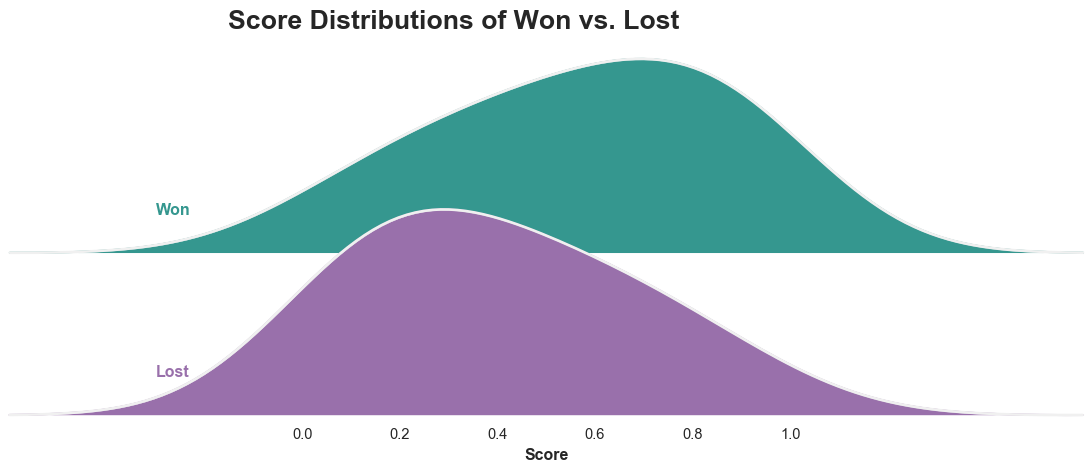

<Figure size 1152x768 with 0 Axes>

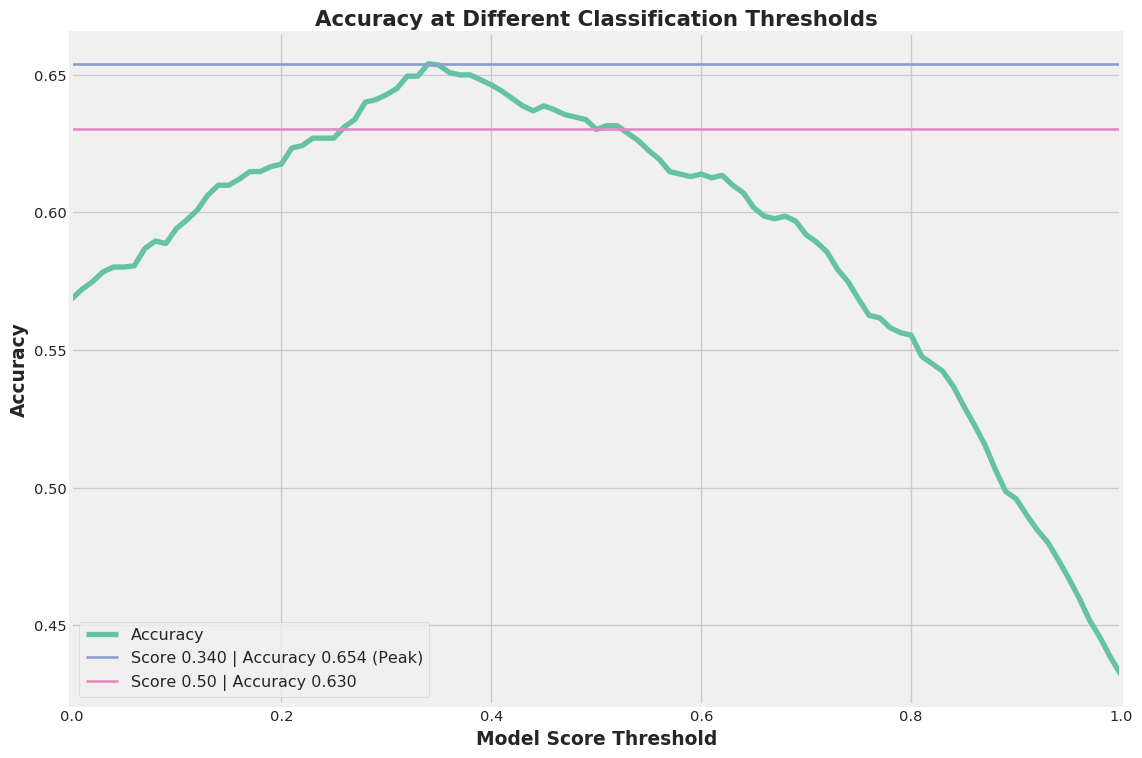

<Figure size 1152x768 with 0 Axes>

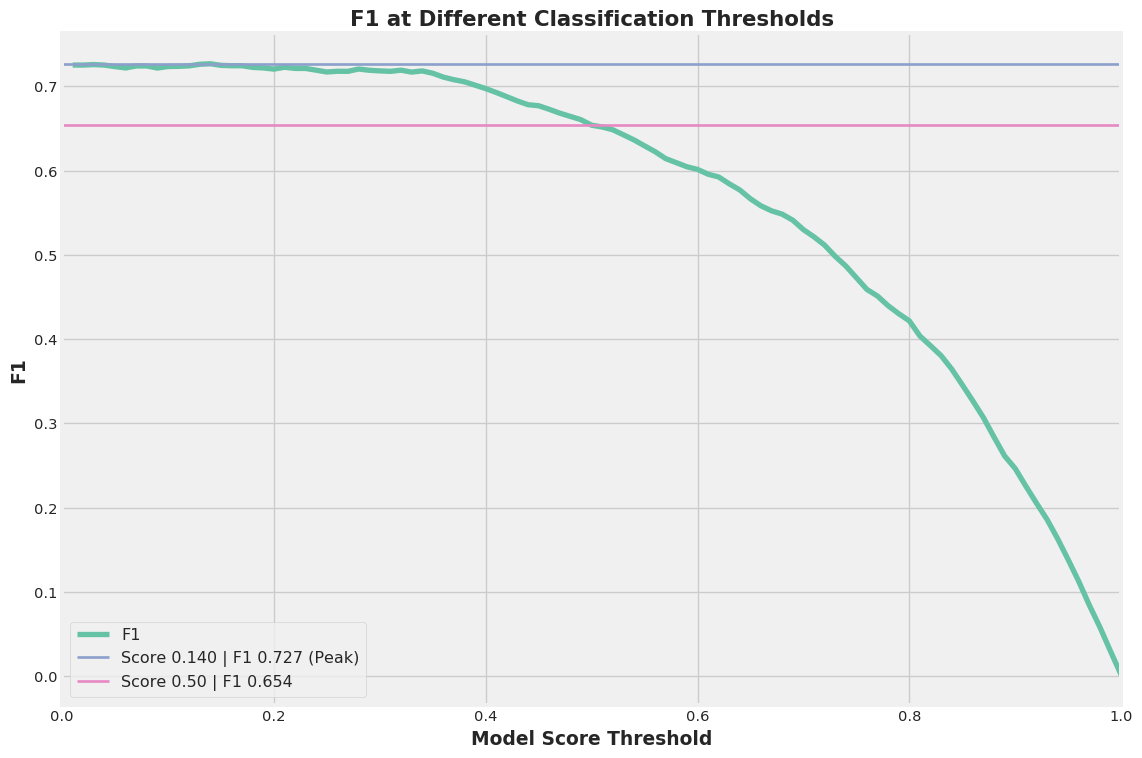

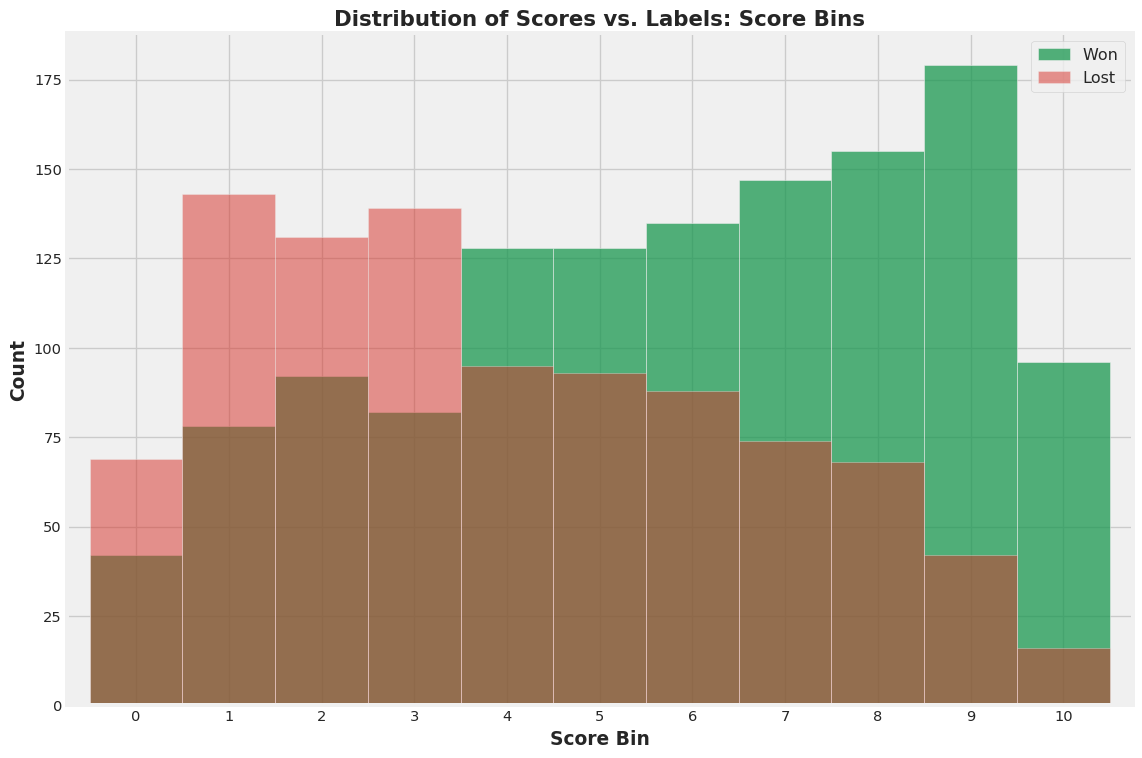

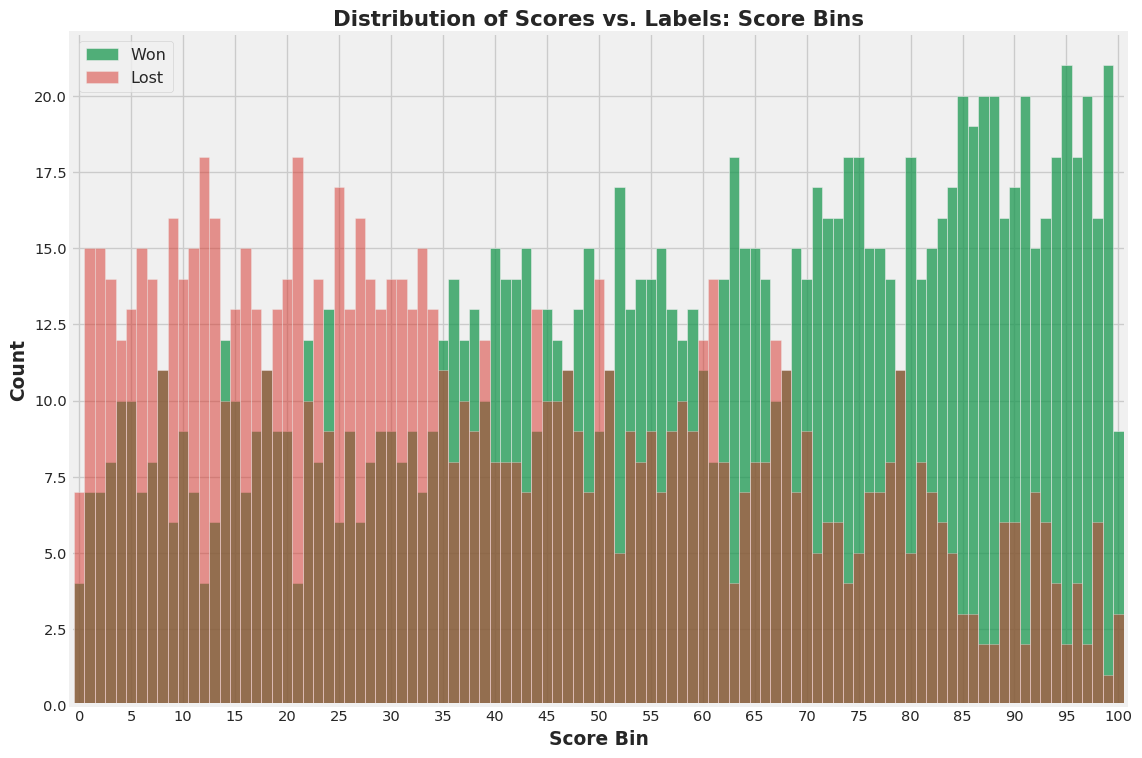

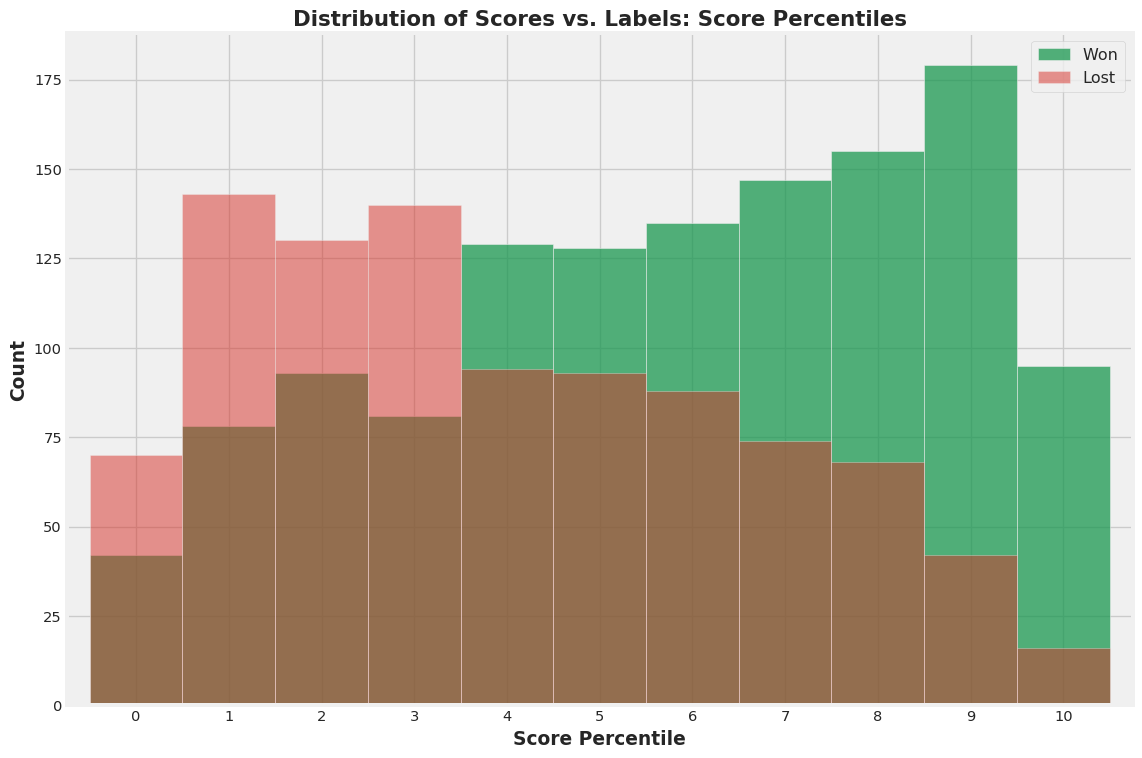

<Figure size 1152x768 with 0 Axes>

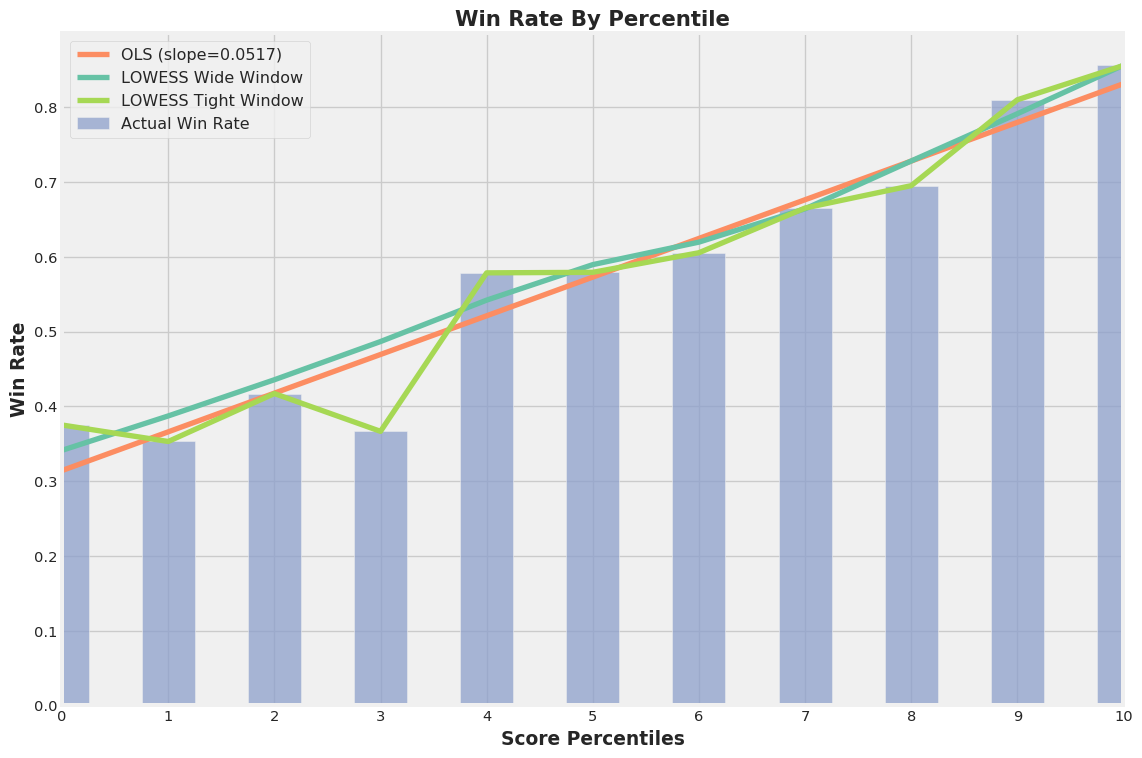

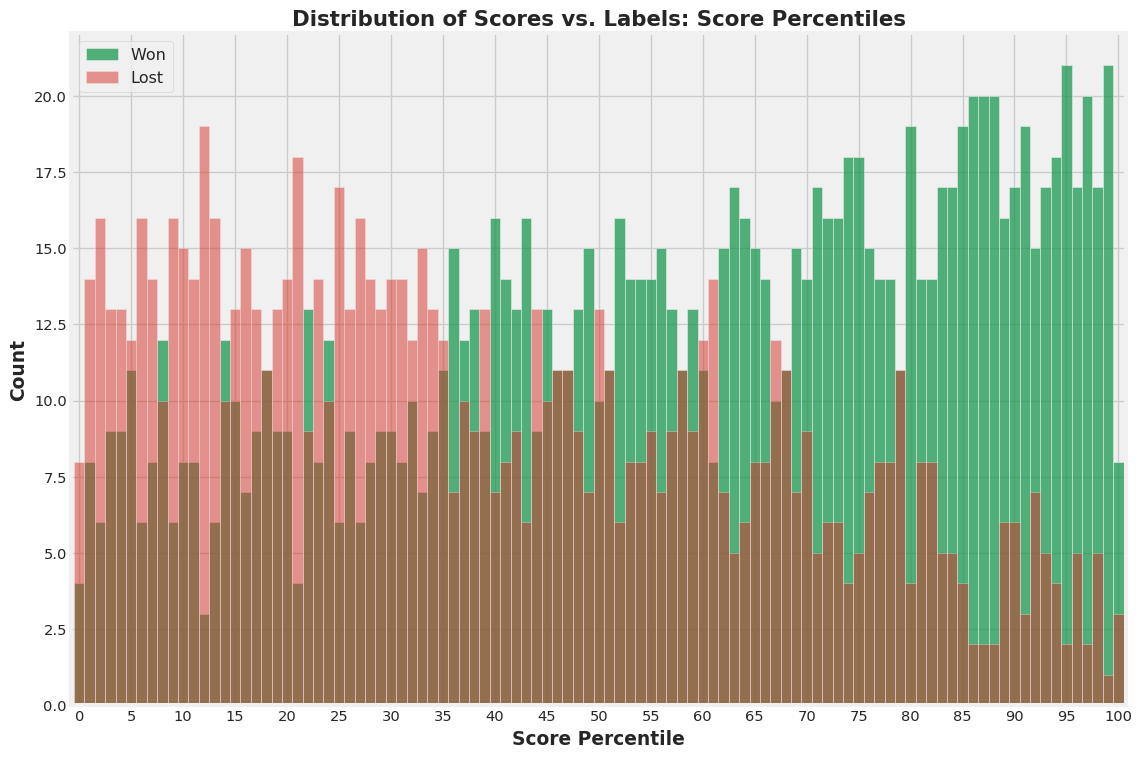

<Figure size 1152x768 with 0 Axes>

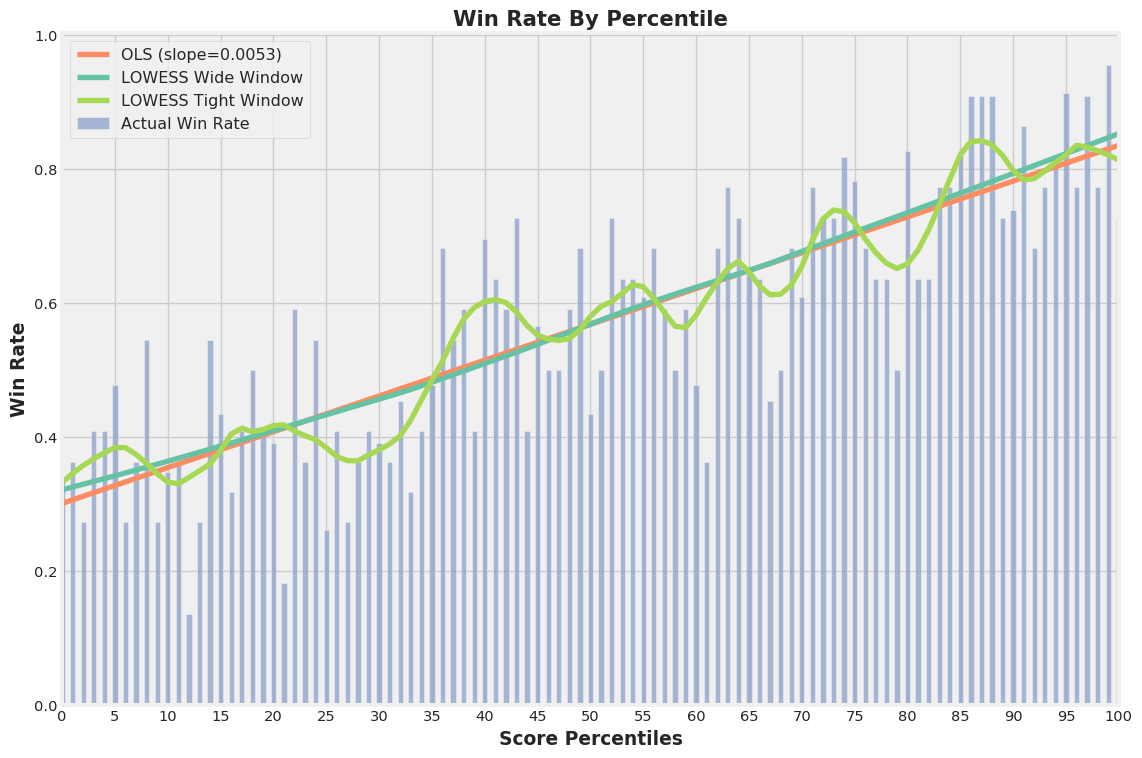

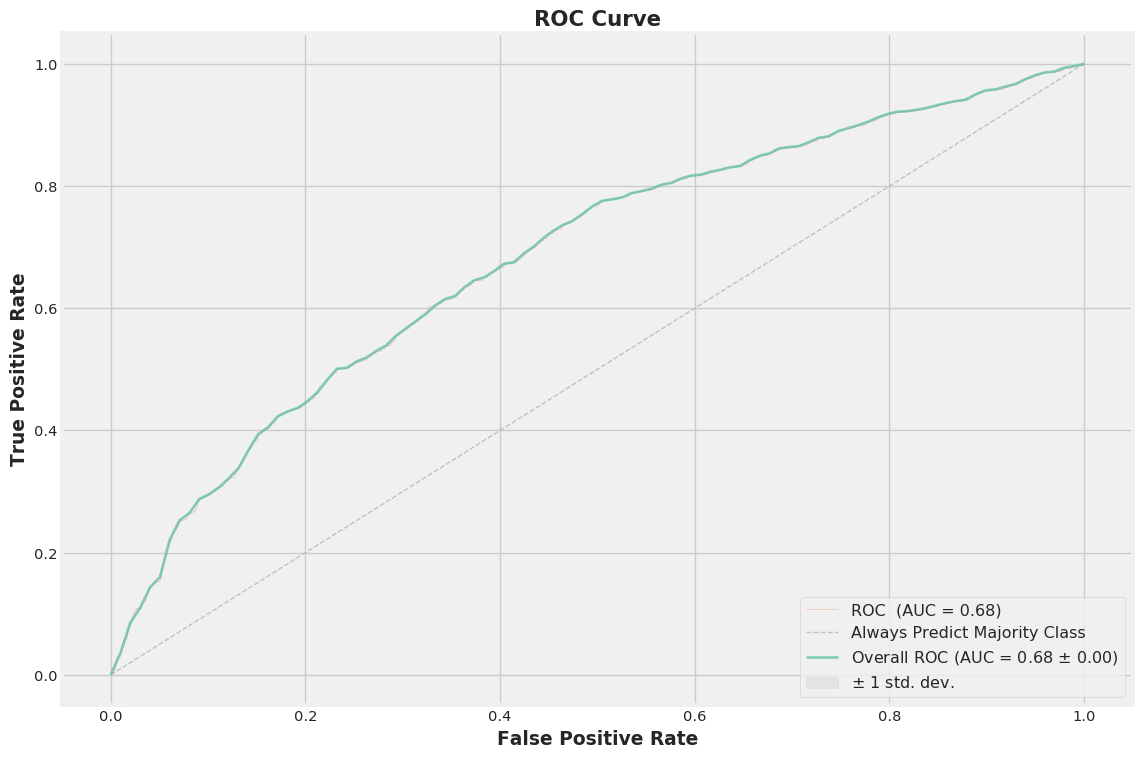

<Figure size 1152x768 with 0 Axes>

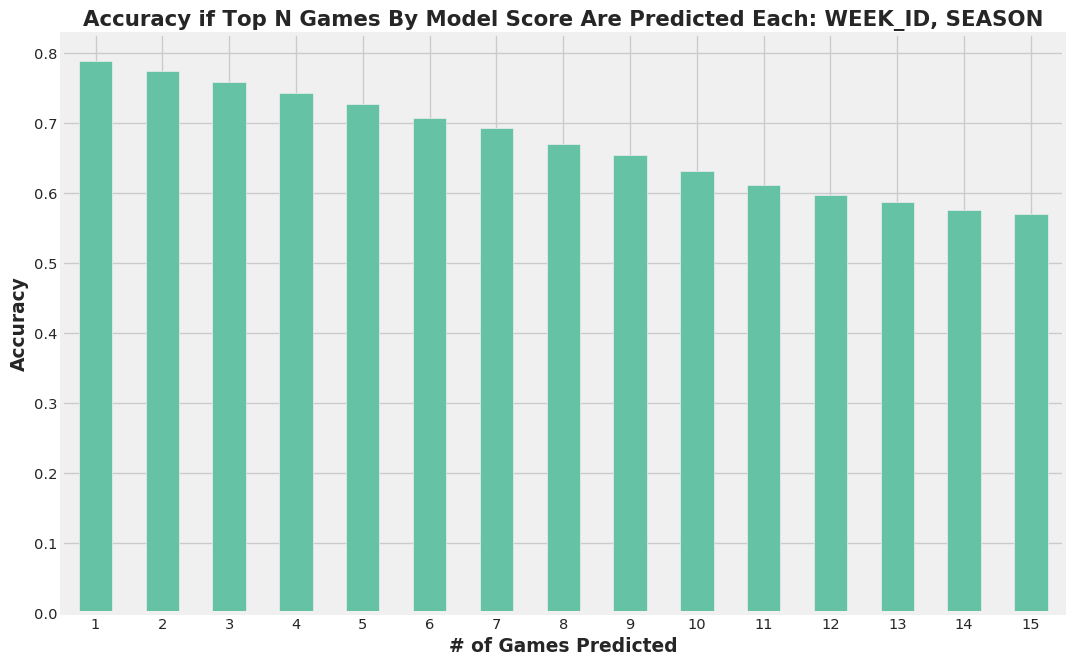

<Figure size 1152x768 with 0 Axes>

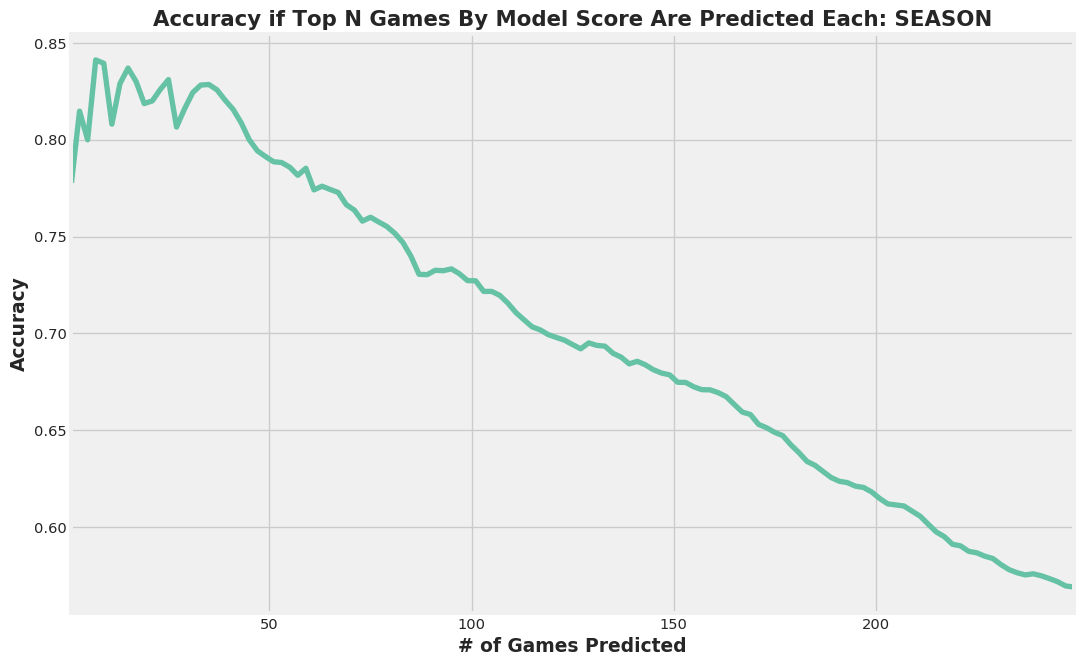

<Figure size 1152x768 with 0 Axes>

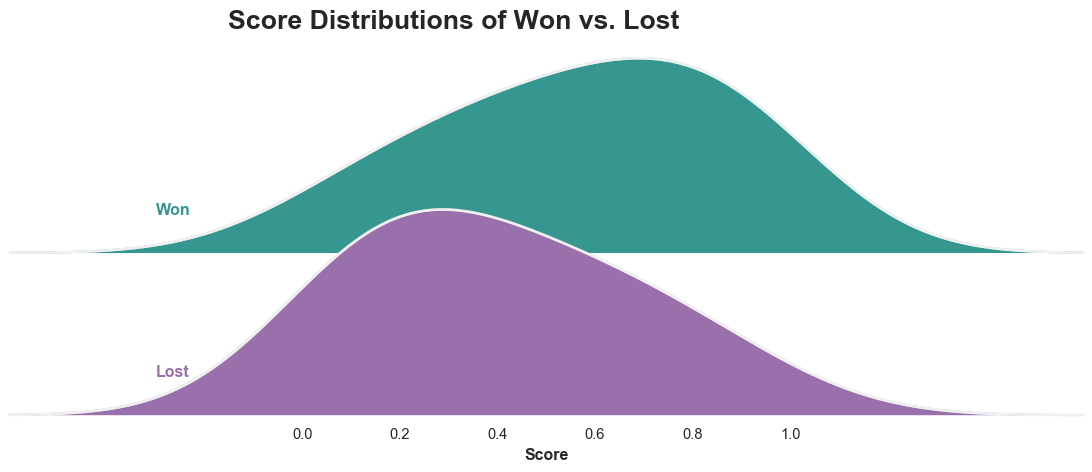

<Figure size 1152x768 with 0 Axes>

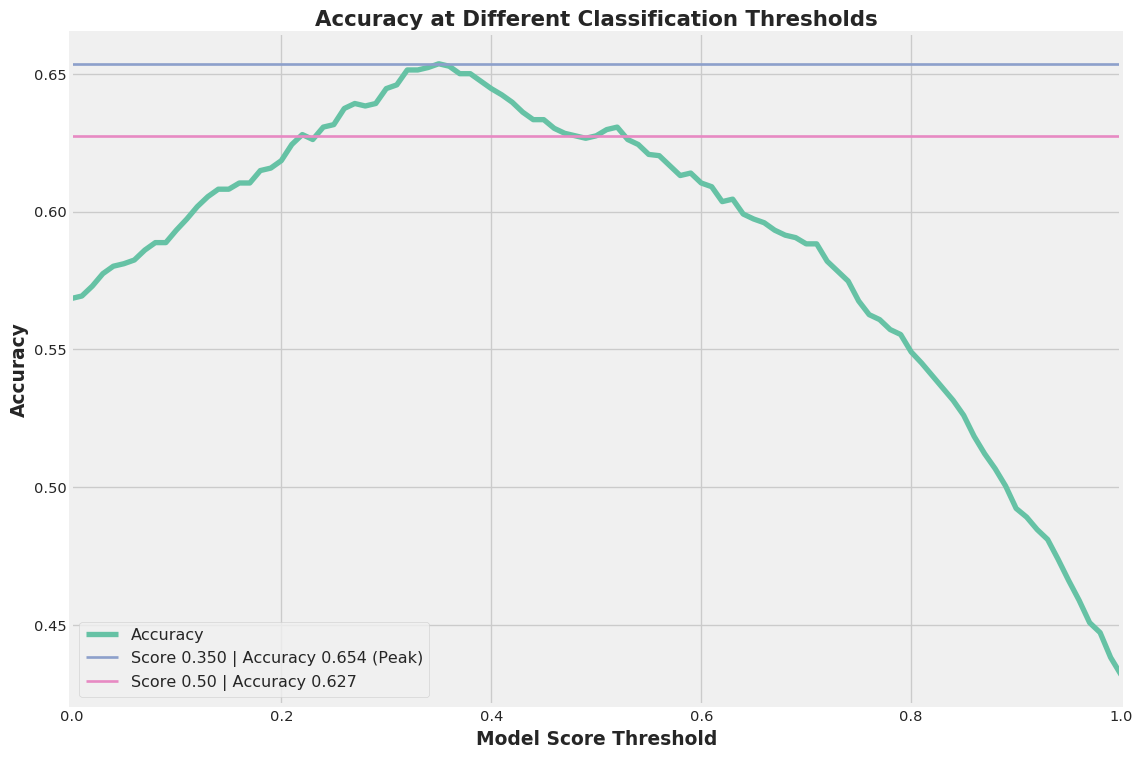

<Figure size 1152x768 with 0 Axes>

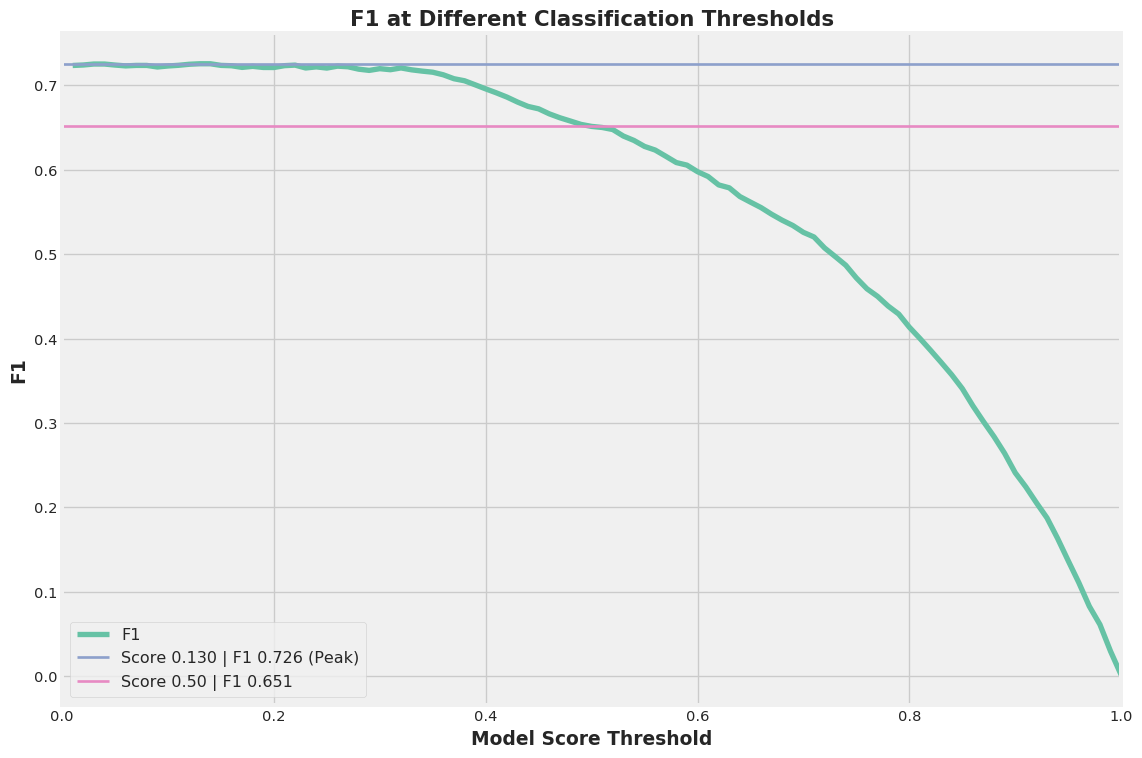

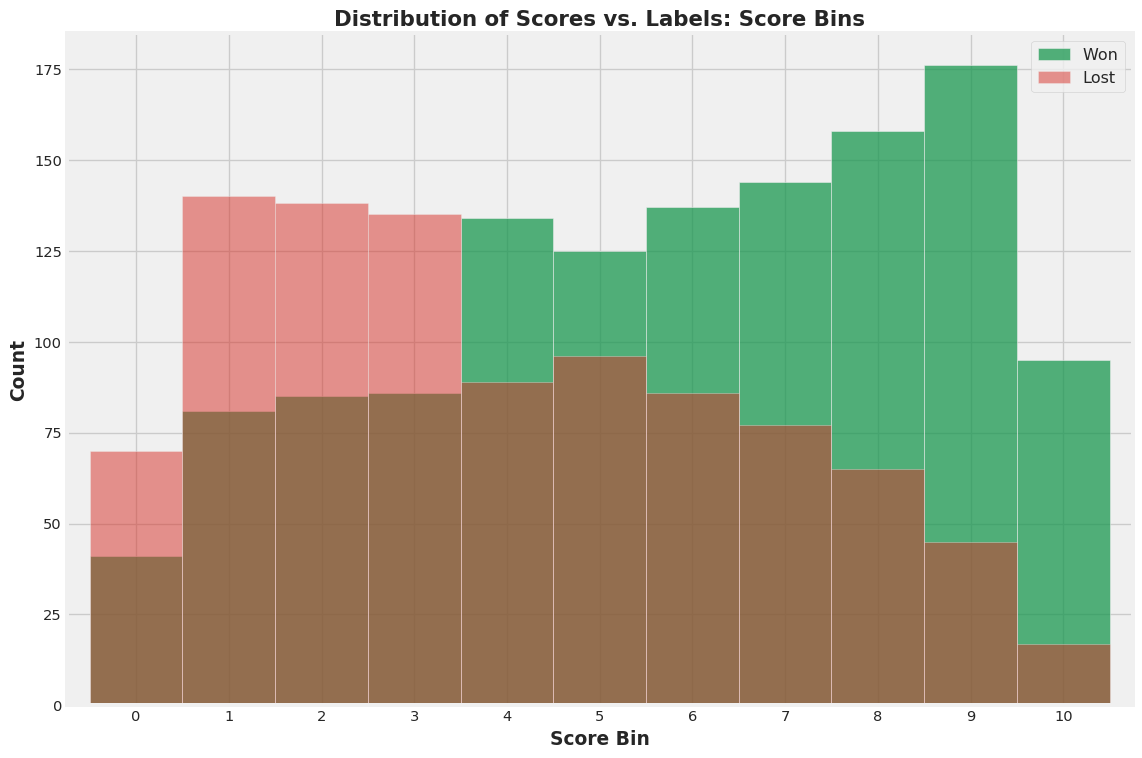

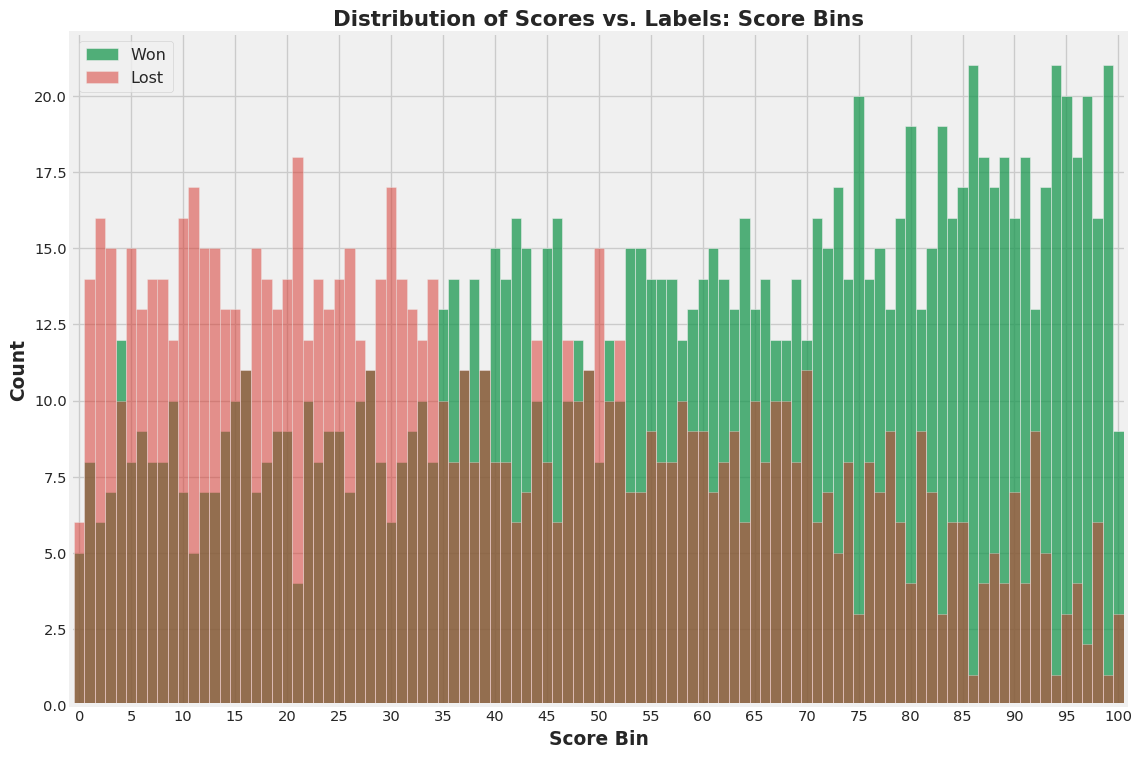

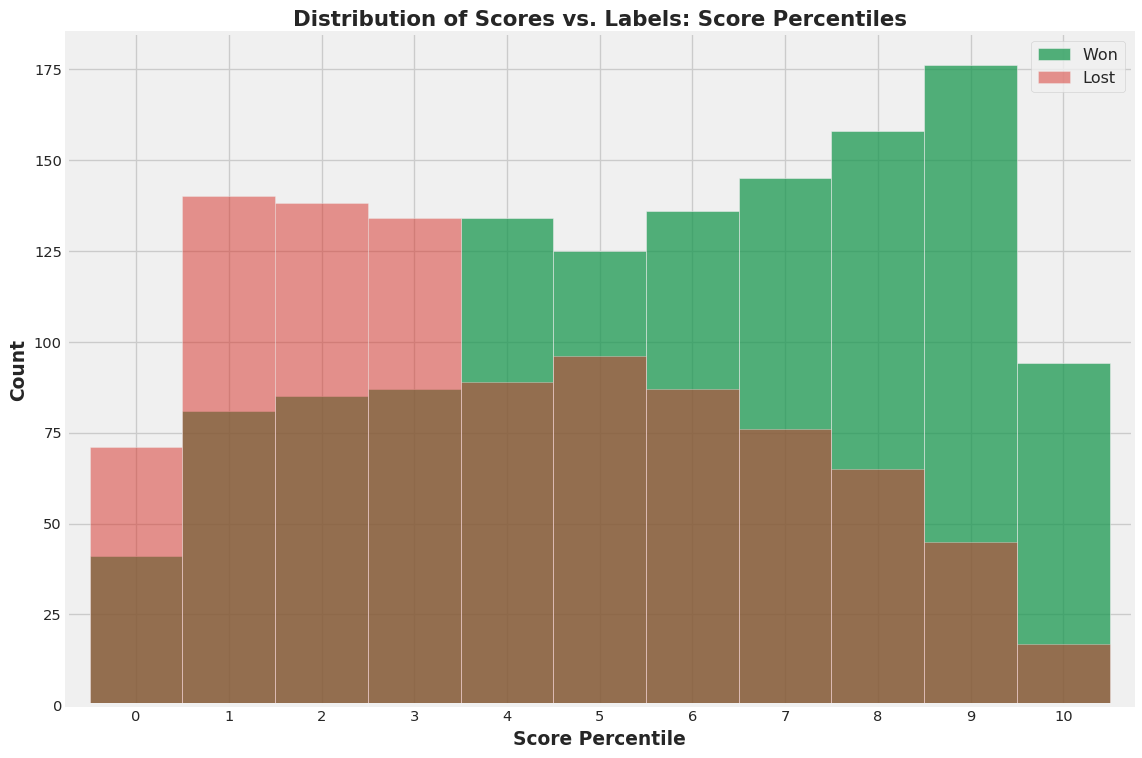

<Figure size 1152x768 with 0 Axes>

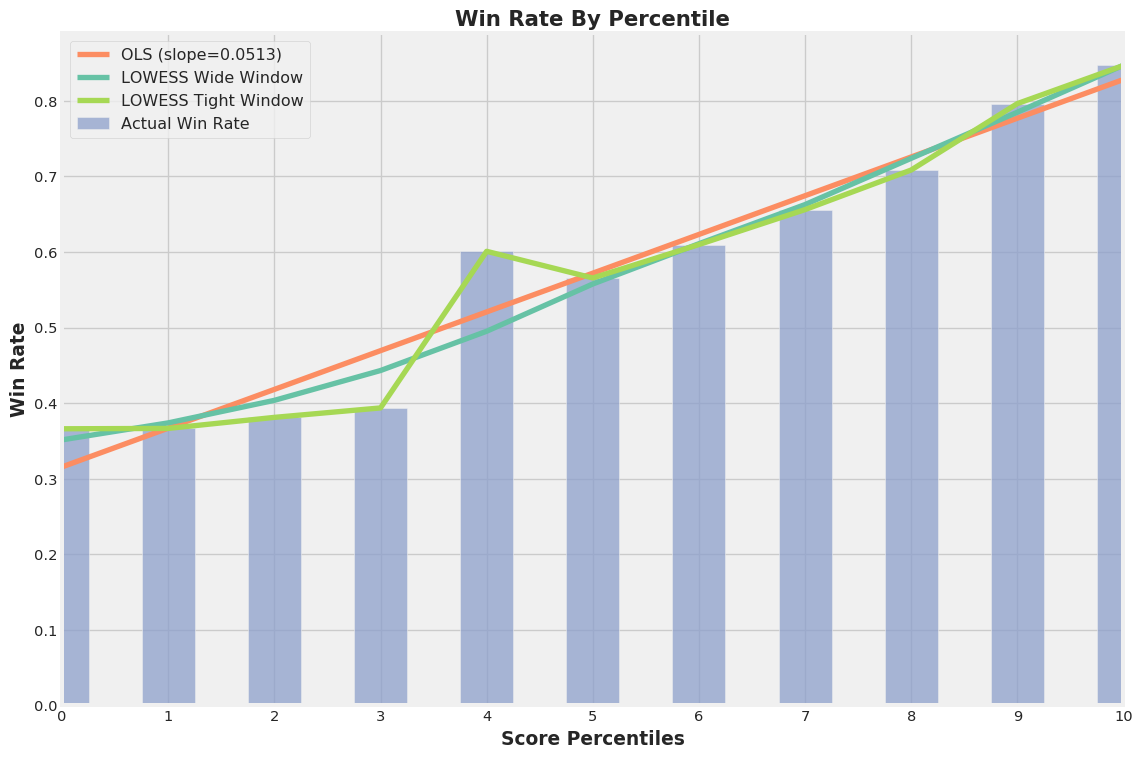

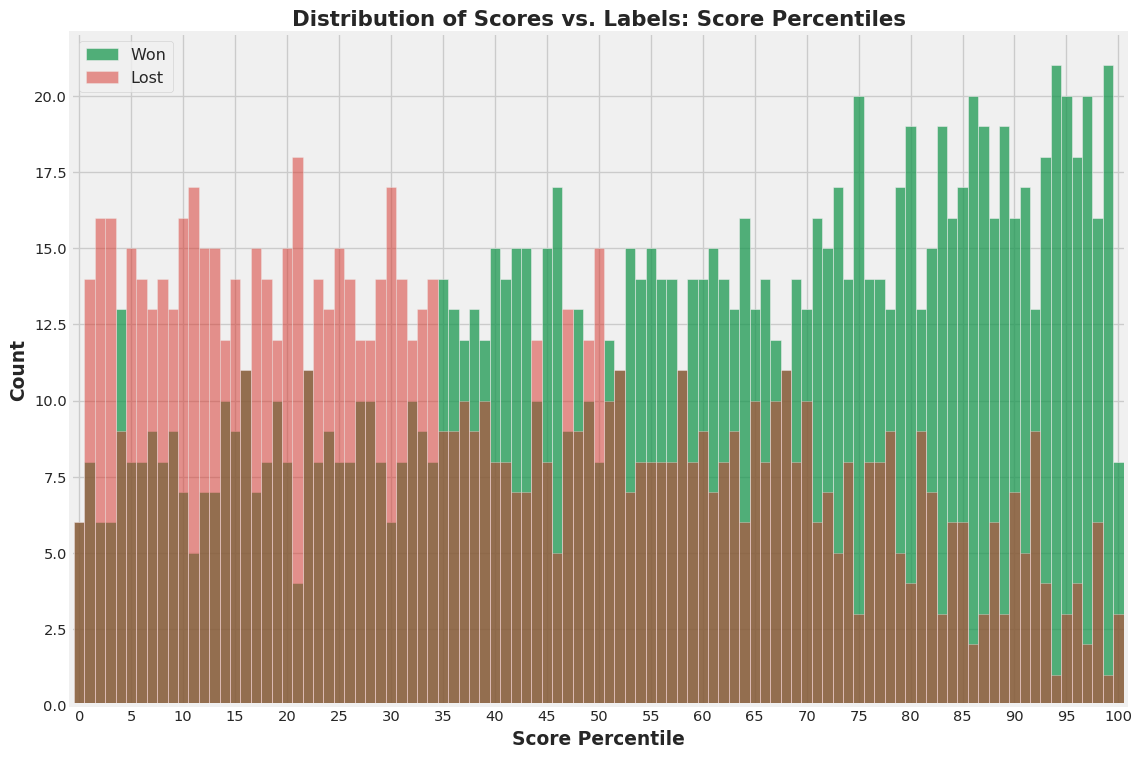

<Figure size 1152x768 with 0 Axes>

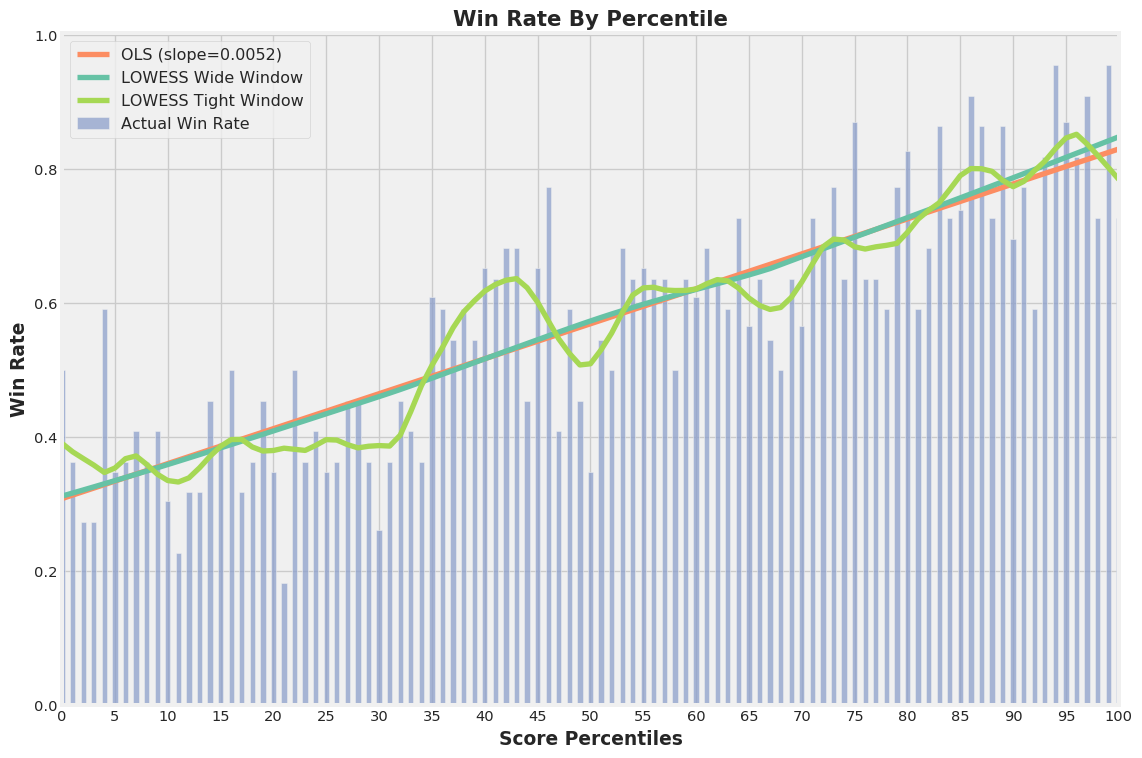

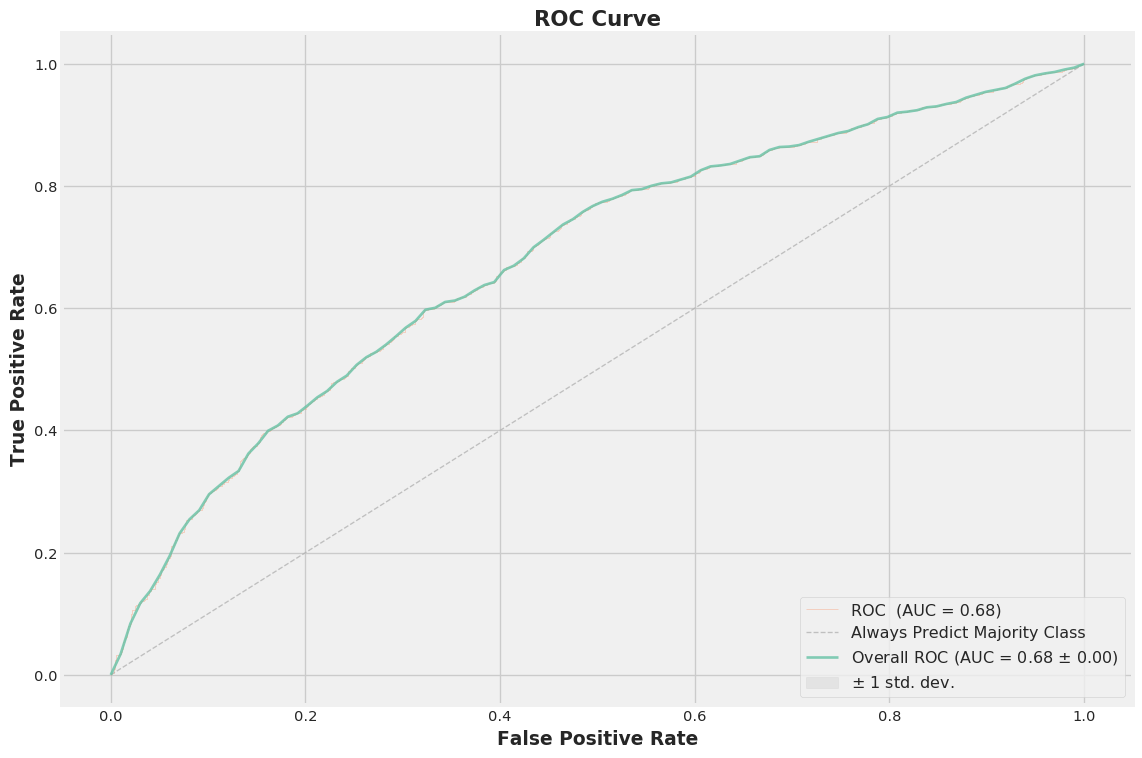

<Figure size 1152x768 with 0 Axes>

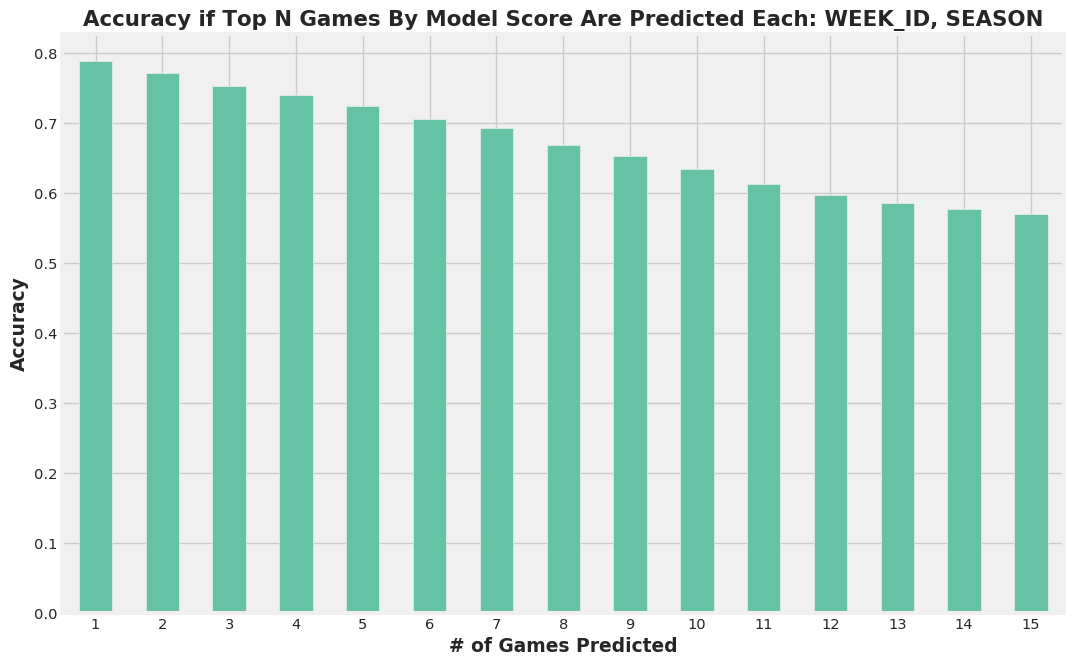

<Figure size 1152x768 with 0 Axes>

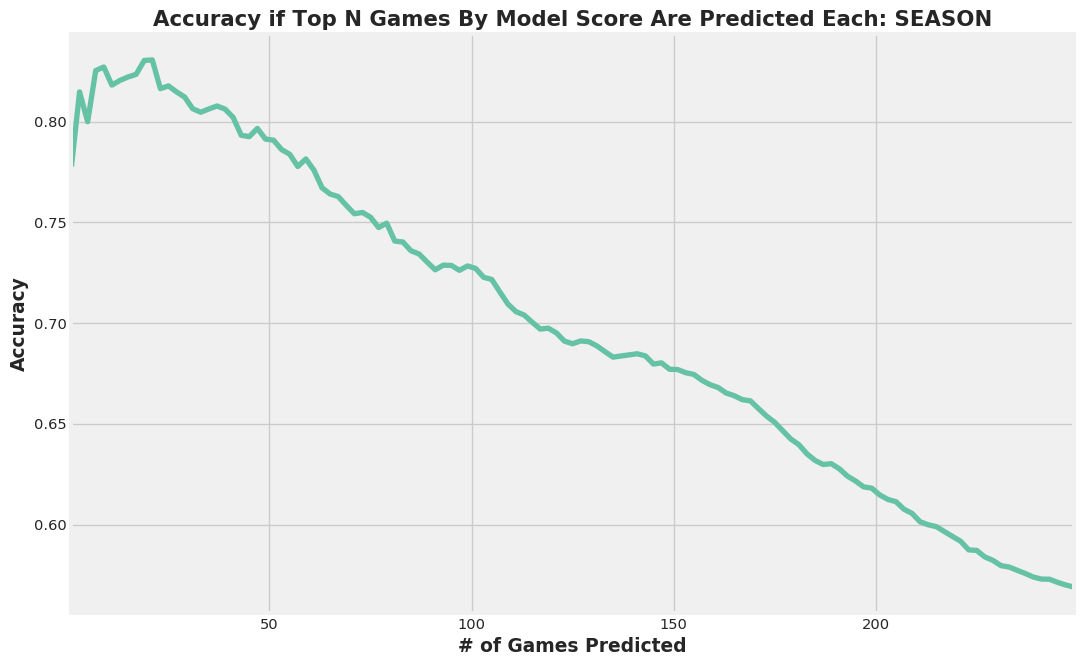

<Figure size 1152x768 with 0 Axes>

In [10]:
ensemble = Ensemble(ensemble_model_json_path, ensemble_evaluate_json_path)
ensemble.execute_ensemble()
ensemble.evaluate_ensemble()

### Execute an ensemble from pre-existing cross-validation data 
* in this case, changed the max depth from 6 to 12
* useful for hyperparameter optimization and feature selection

In [11]:
ensemble_model_load_cv_json_path = 'model_configs/ensemble_model_load_cv__regression_example.json'
pprint(json.load(open(ensemble_model_load_cv_json_path)))

{'aggregation_method': ['mean', 'median'],
 'ensemble_model_id': 'ensemble_load_cv',
 'evaluation_config': 'model_configs/ensemble_evaluate__regression_example.json',
 'input_changes_by_iteration': {'model_params': [{'booster': 'gbtree',
                                                  'gamma': 0,
                                                  'learning_rate': 0.1,
                                                  'max_depth': 12,
                                                  'max_features': 'auto',
                                                  'n_estimators': 100,
                                                  'n_jobs': 1,
                                                  'nthread': None,
                                                  'objective': 'reg:linear',
                                                  'random_state': 9,
                                                  'silent': True,
                                                  'subsample': 0.5},
     

removed /Users/jplotkin/Dropbox/data_science/modeling-football-outcomes/models/ensemble_load_cv...
BEFORE {'n_jobs': 1, 'learning_rate': 0.1, 'n_estimators': 100, 'max_features': 'auto', 'booster': 'gbtree', 'silent': True, 'nthread': None, 'subsample': 0.5, 'random_state': 9, 'objective': 'reg:linear', 'max_depth': 6, 'gamma': 0}
AFTER {'n_jobs': 1, 'learning_rate': 0.1, 'n_estimators': 100, 'max_features': 'auto', 'booster': 'gbtree', 'silent': True, 'nthread': None, 'subsample': 0.5, 'random_state': 9, 'objective': 'reg:linear', 'max_depth': 12, 'gamma': 0}
BEFORE {'n_jobs': 1, 'learning_rate': 0.1, 'n_estimators': 100, 'max_features': 'auto', 'booster': 'gbtree', 'silent': True, 'nthread': None, 'subsample': 0.5, 'random_state': 9, 'objective': 'reg:linear', 'max_depth': 6, 'gamma': 0}
AFTER {'n_jobs': 1, 'learning_rate': 0.1, 'n_estimators': 100, 'max_features': 'auto', 'booster': 'gbtree', 'silent': True, 'nthread': None, 'subsample': 0.5, 'random_state': 9, 'objective': 'reg:lin

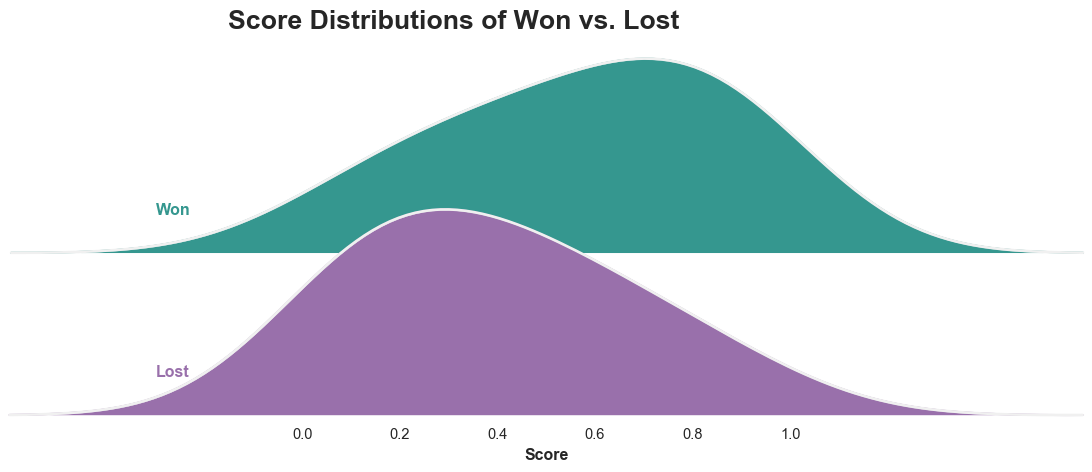

<Figure size 1152x768 with 0 Axes>

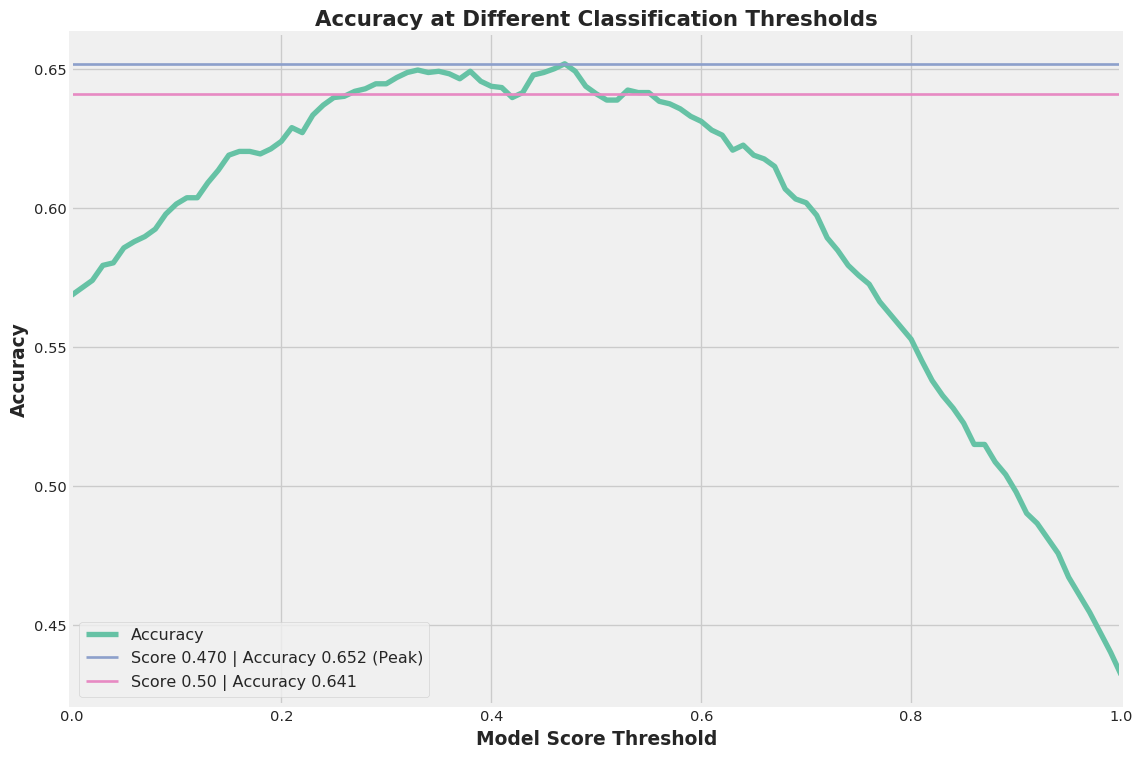

<Figure size 1152x768 with 0 Axes>

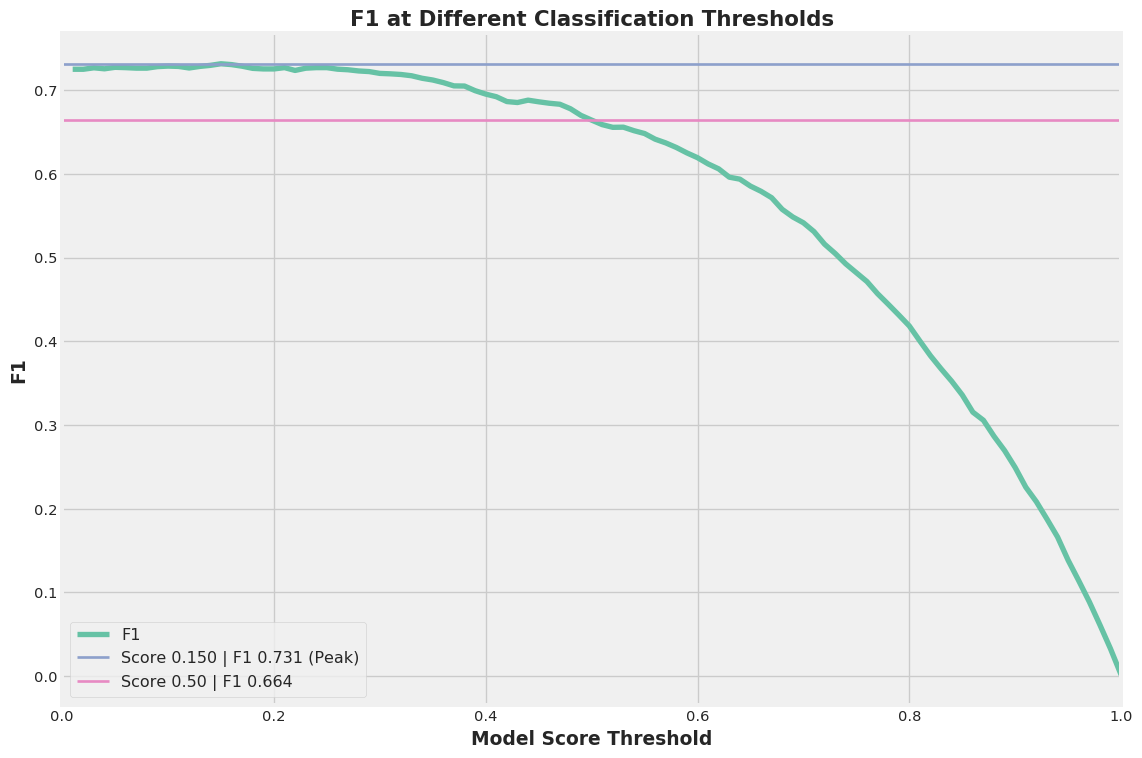

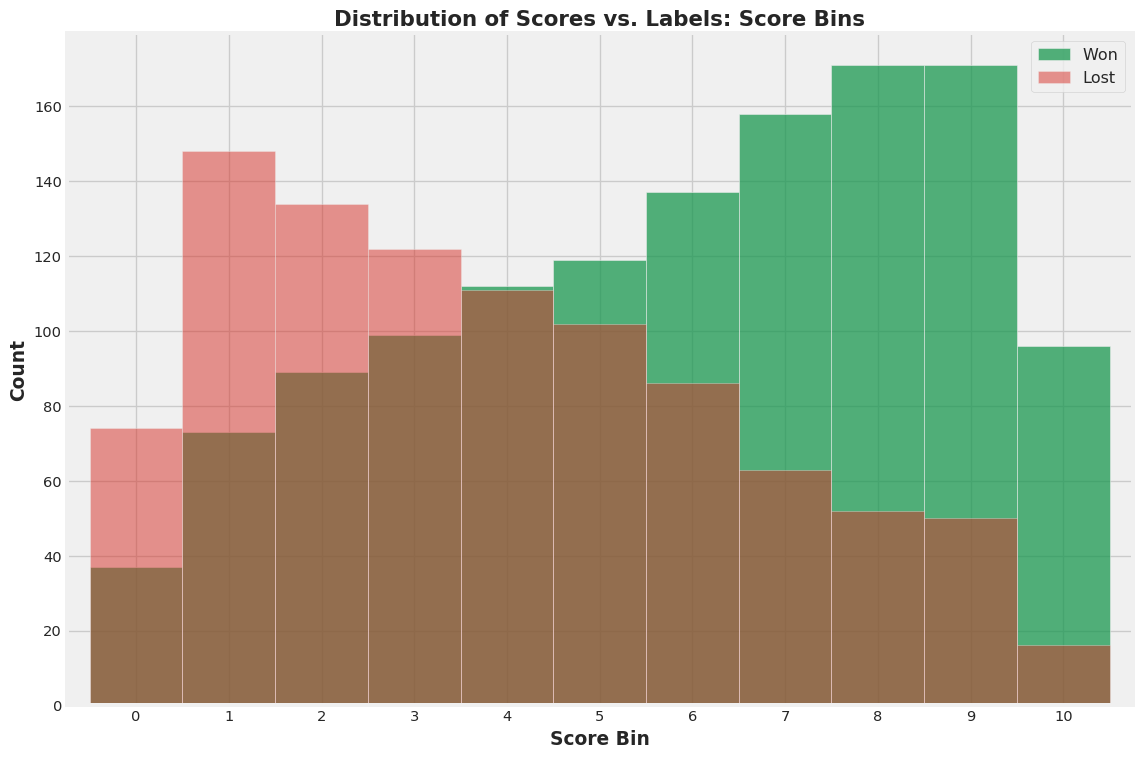

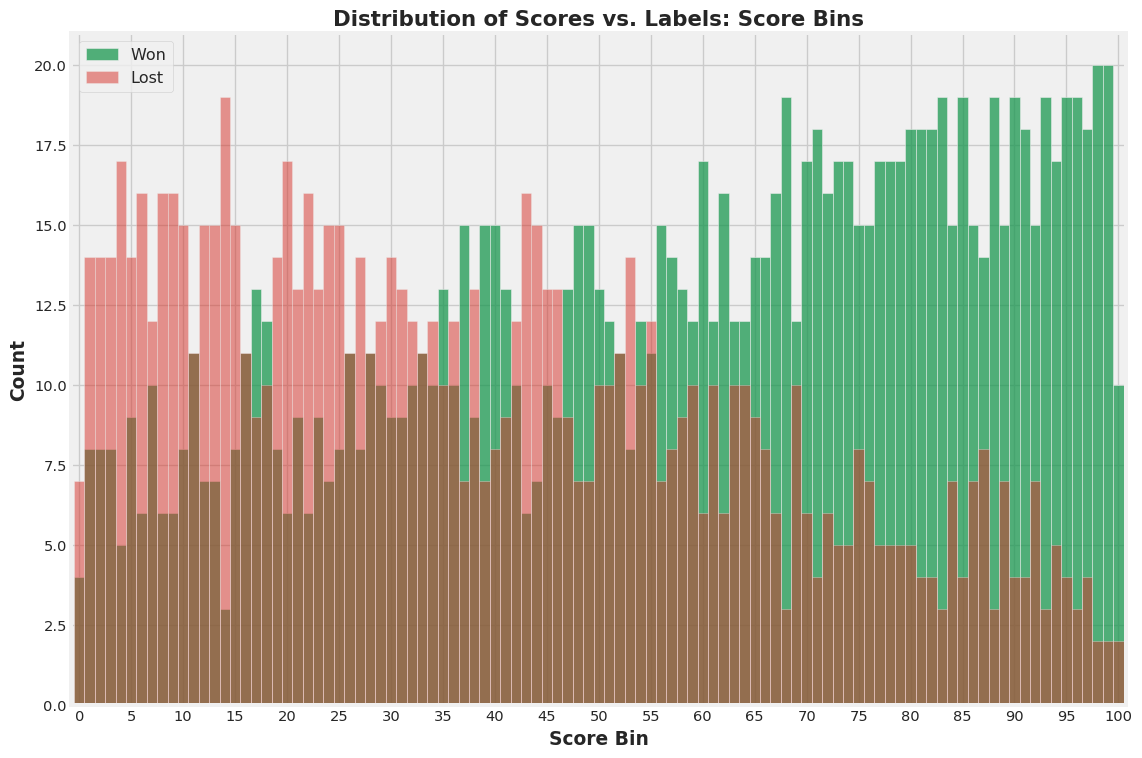

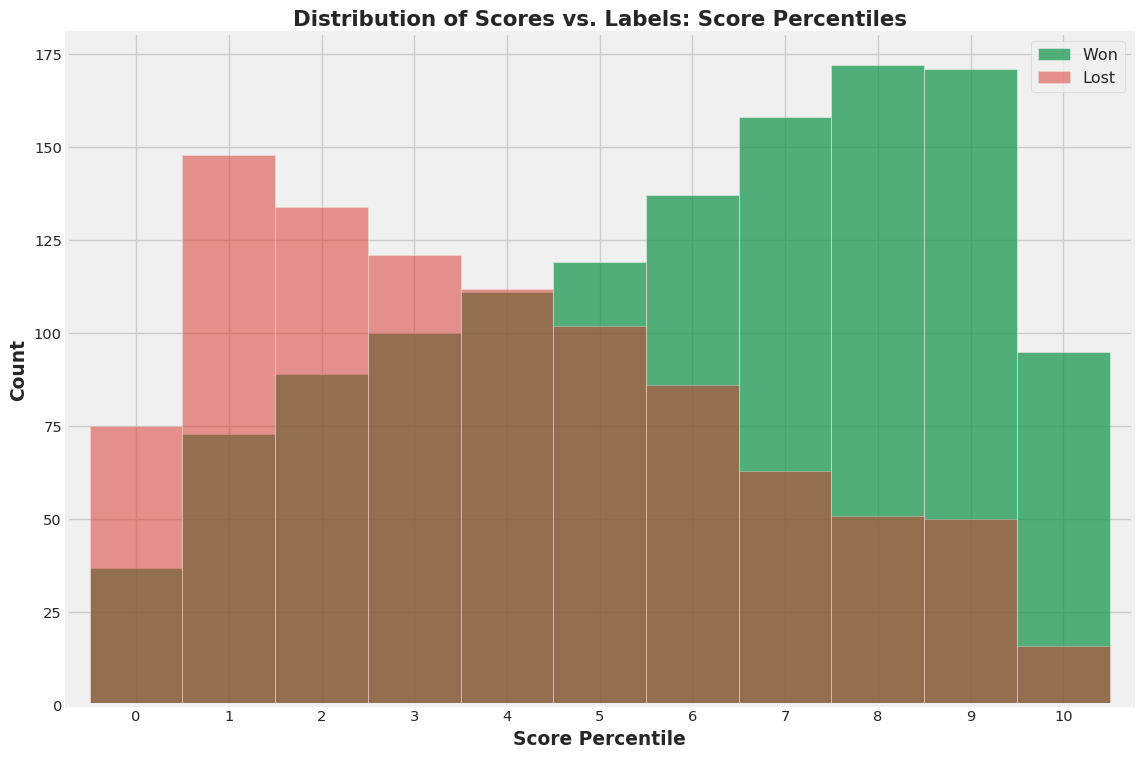

<Figure size 1152x768 with 0 Axes>

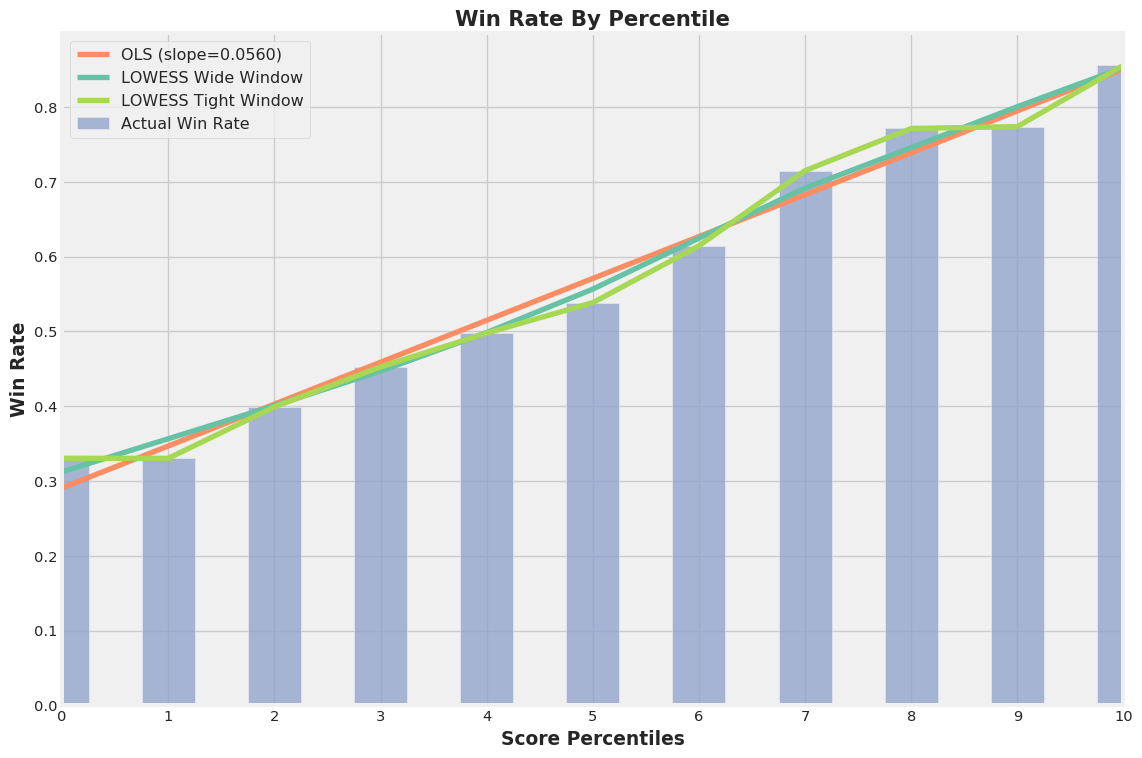

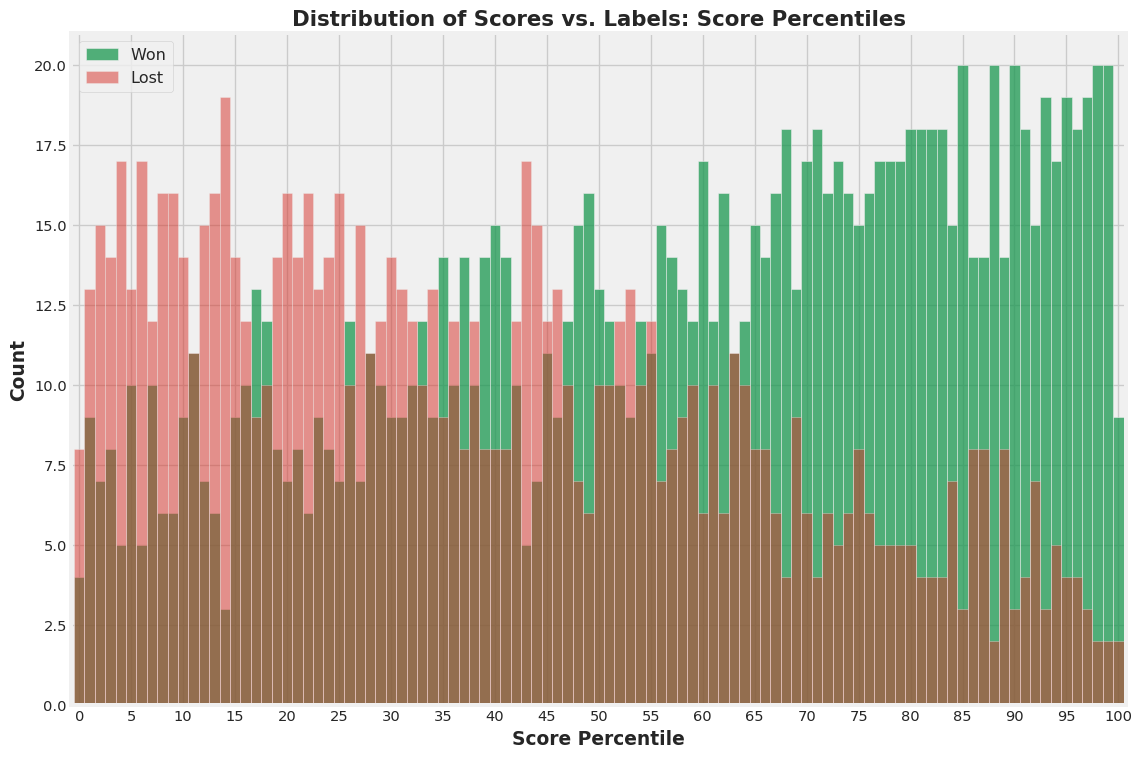

<Figure size 1152x768 with 0 Axes>

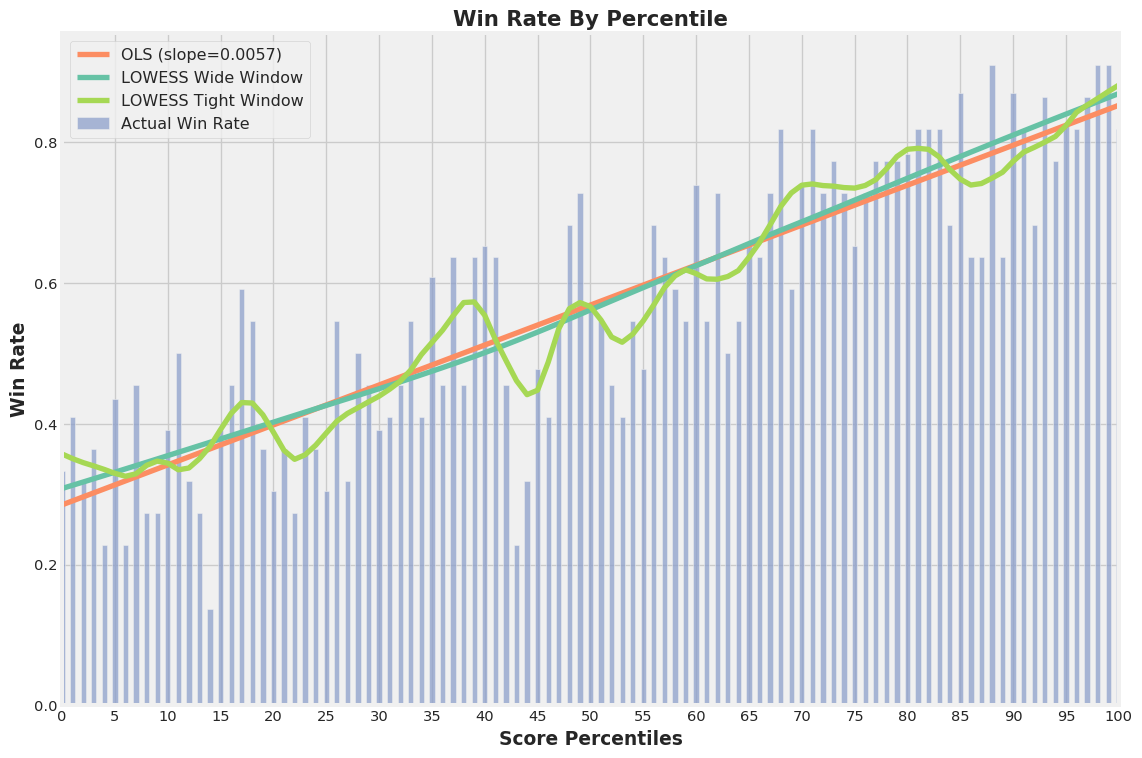

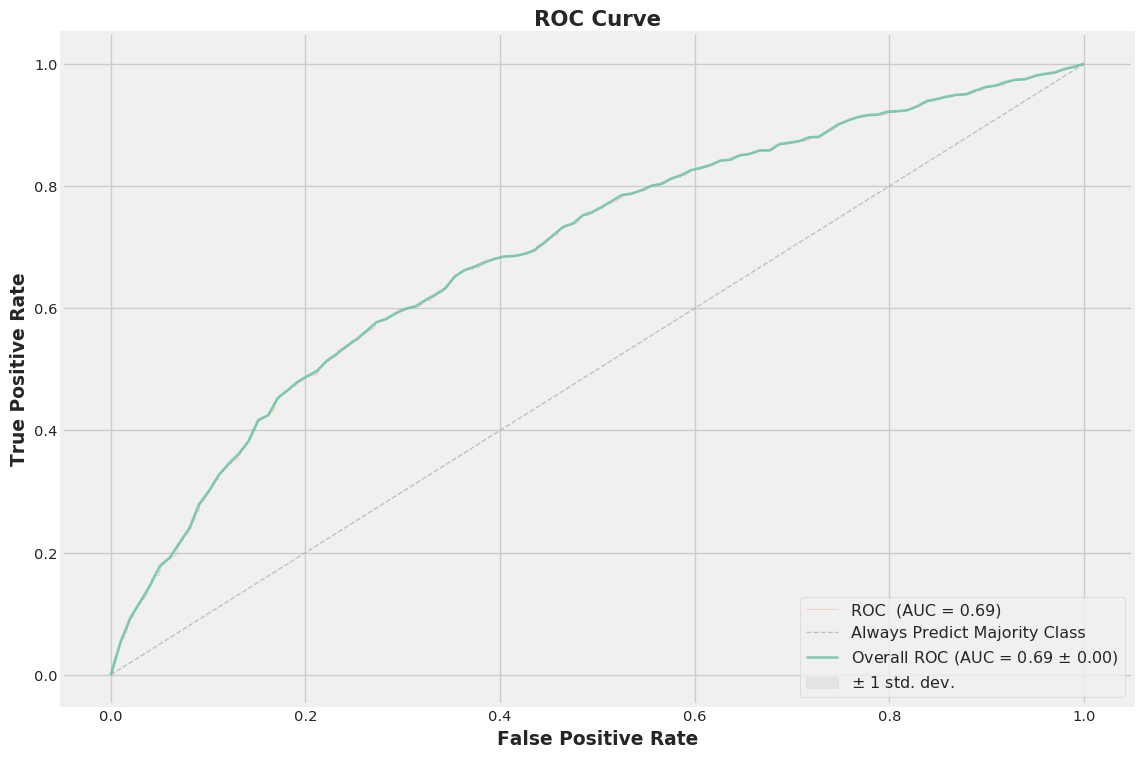

<Figure size 1152x768 with 0 Axes>

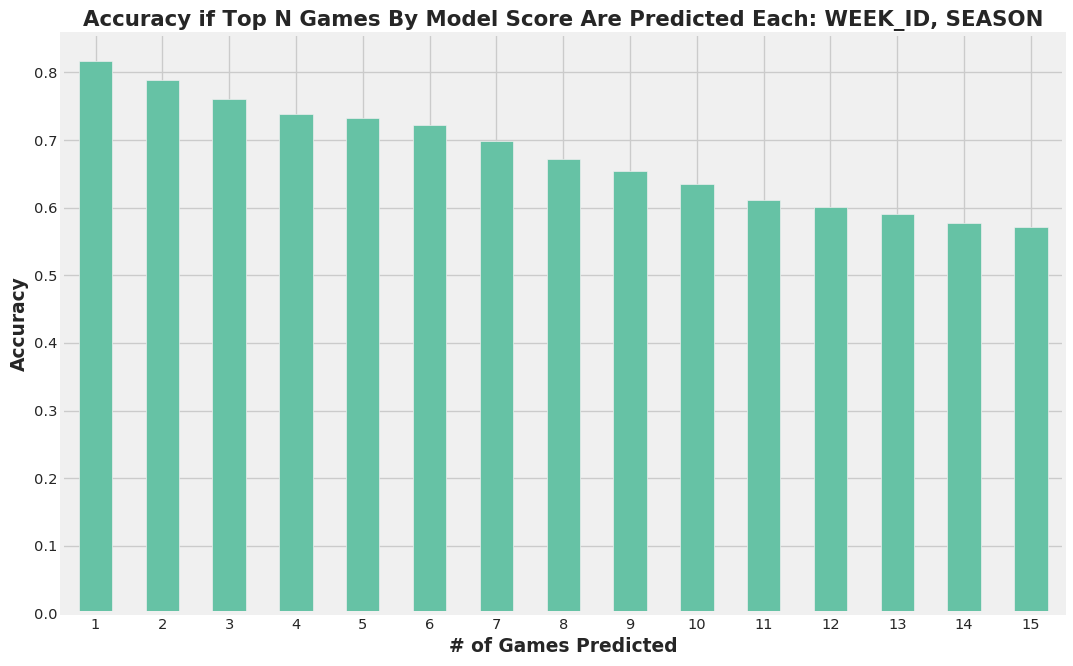

<Figure size 1152x768 with 0 Axes>

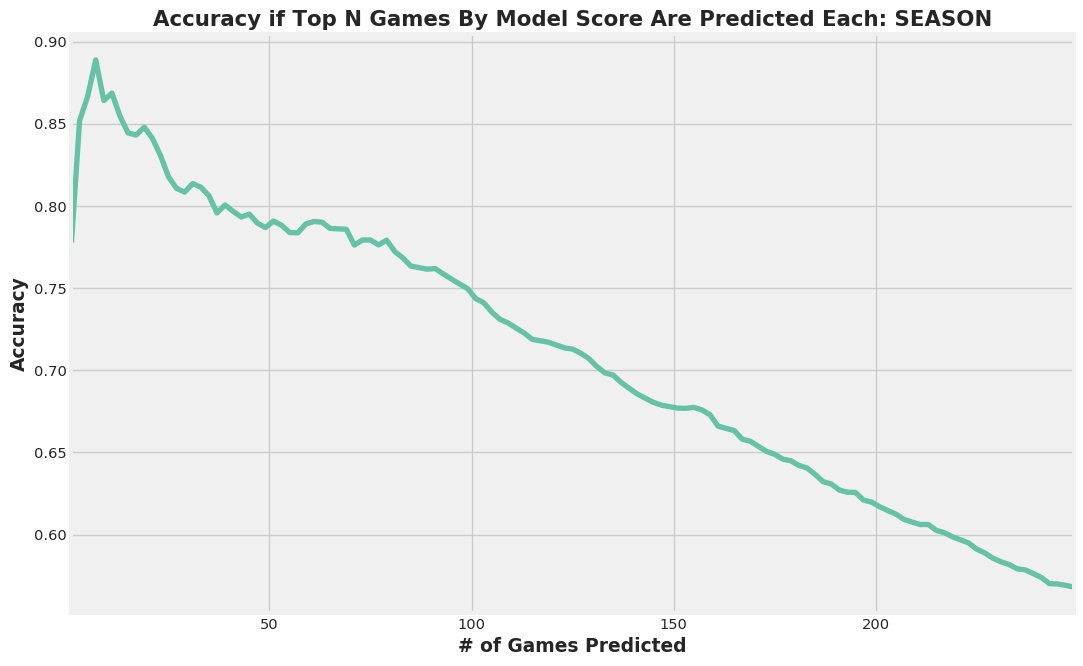

<Figure size 1152x768 with 0 Axes>

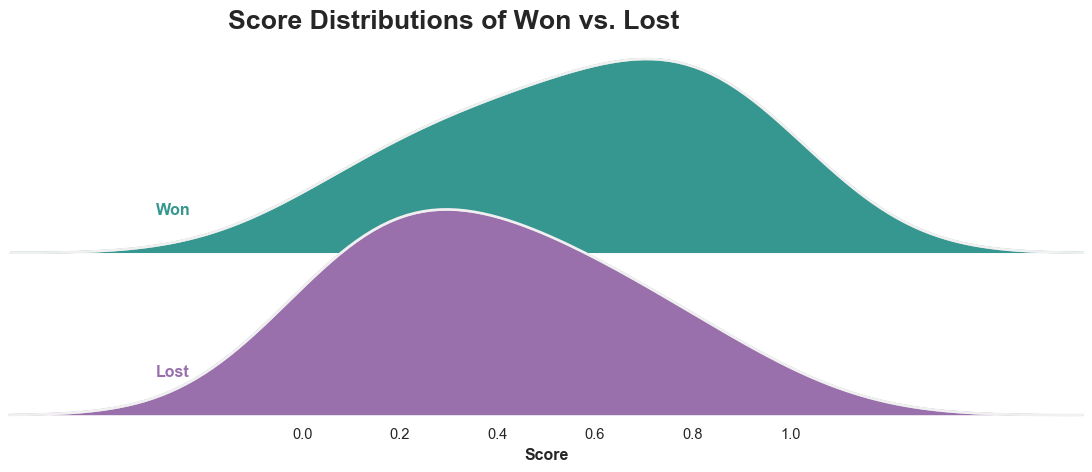

<Figure size 1152x768 with 0 Axes>

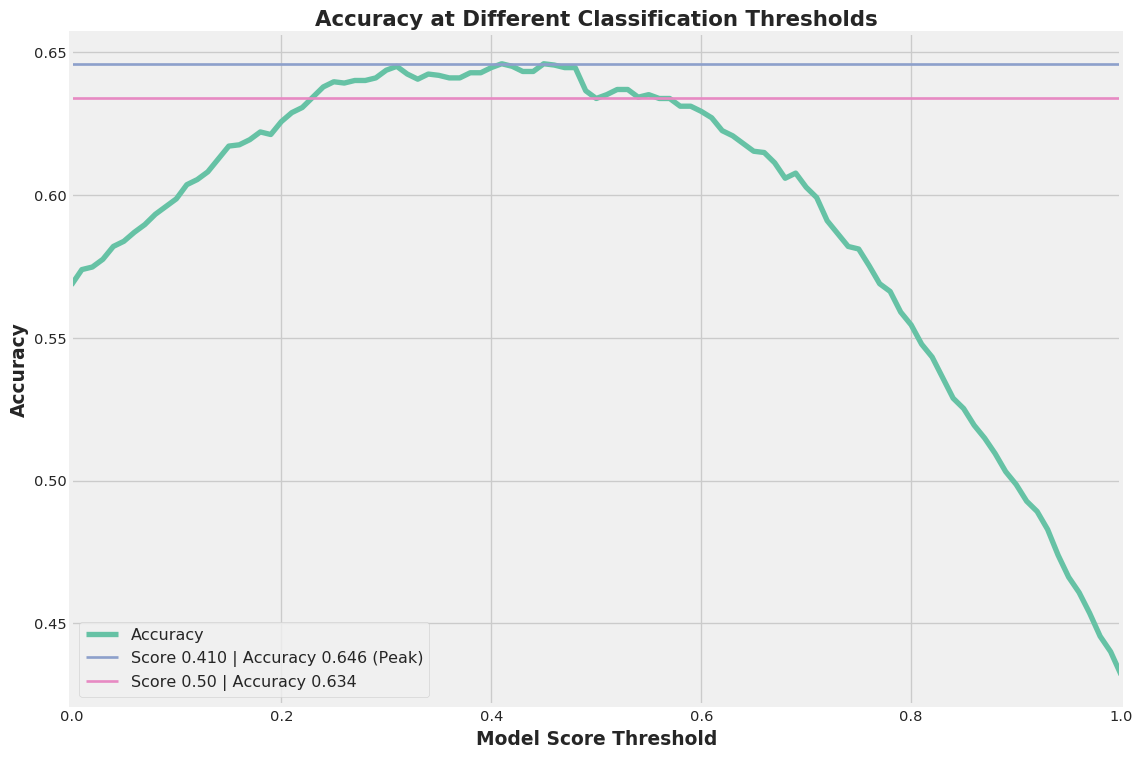

<Figure size 1152x768 with 0 Axes>

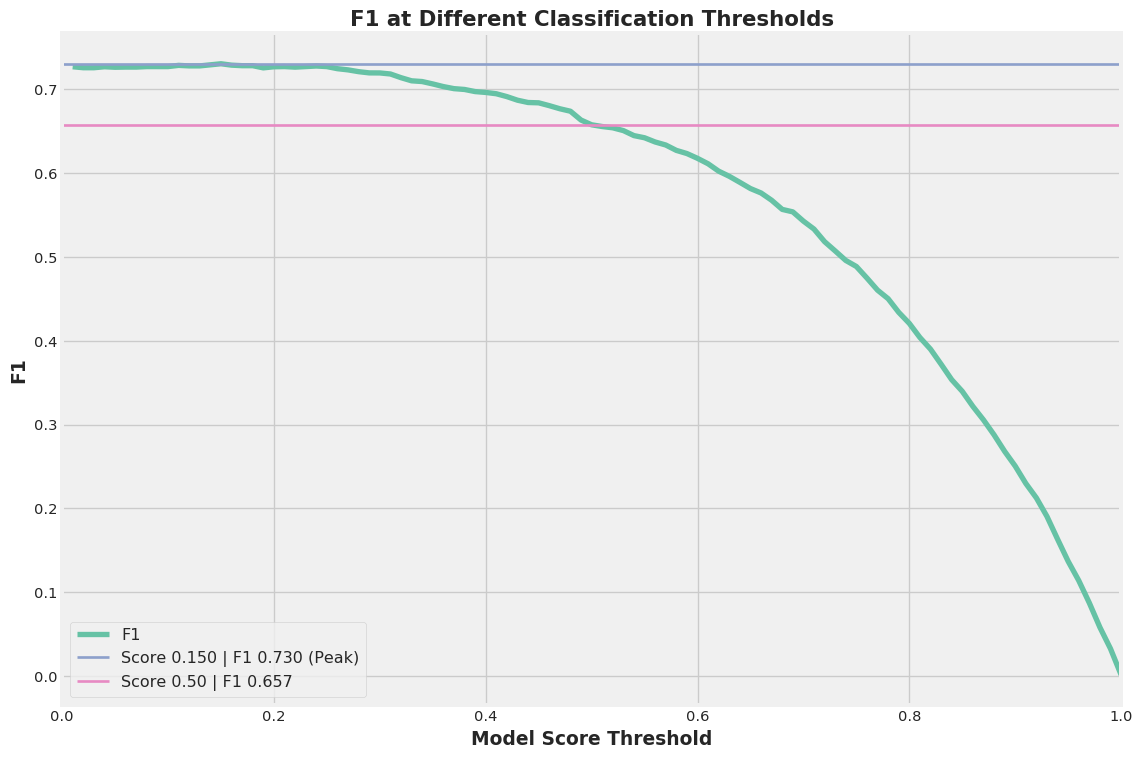

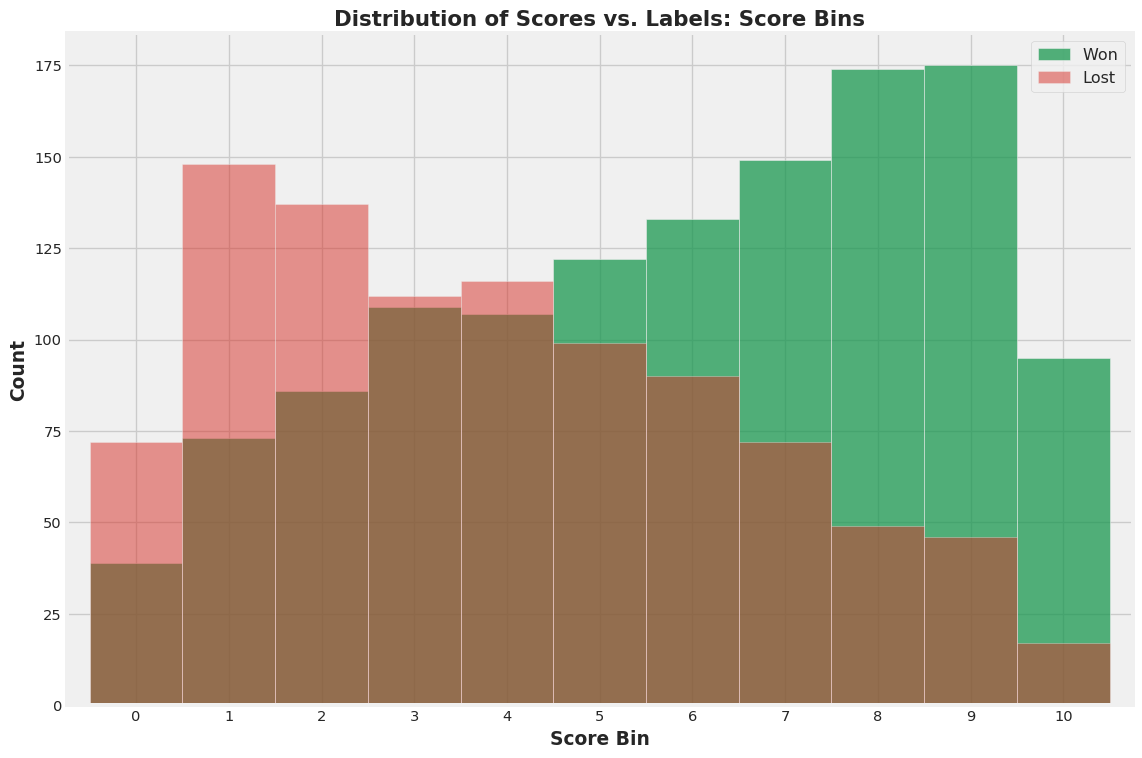

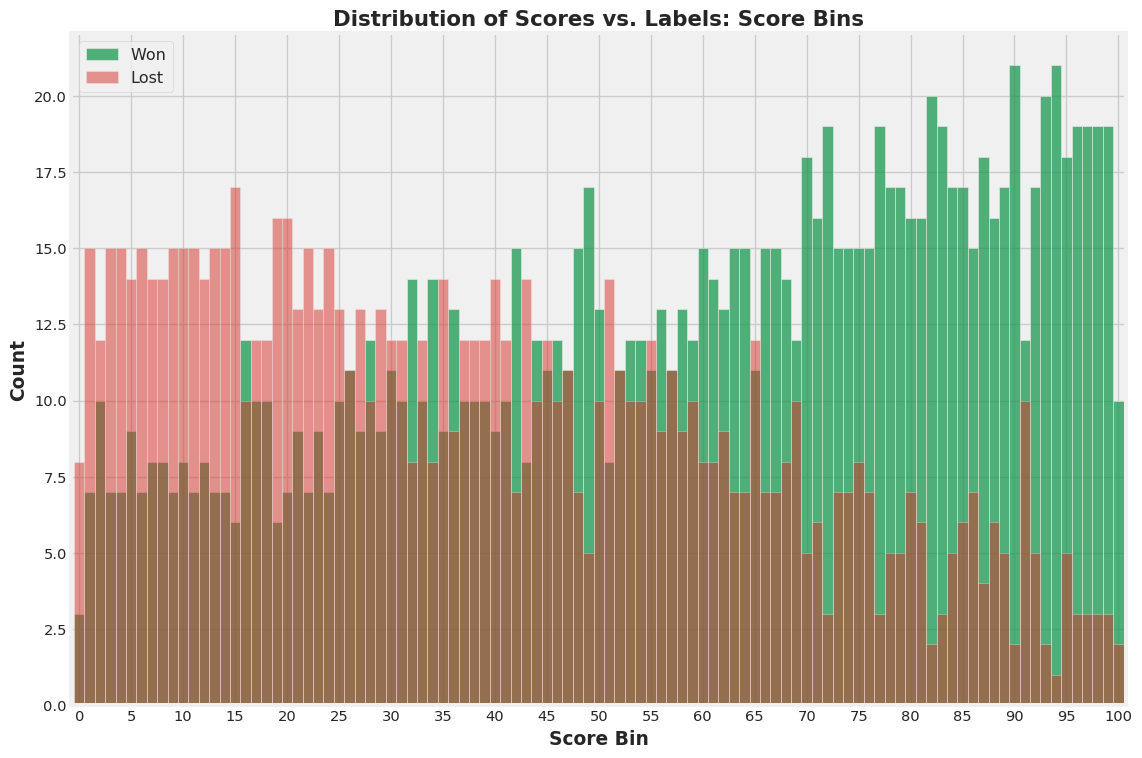

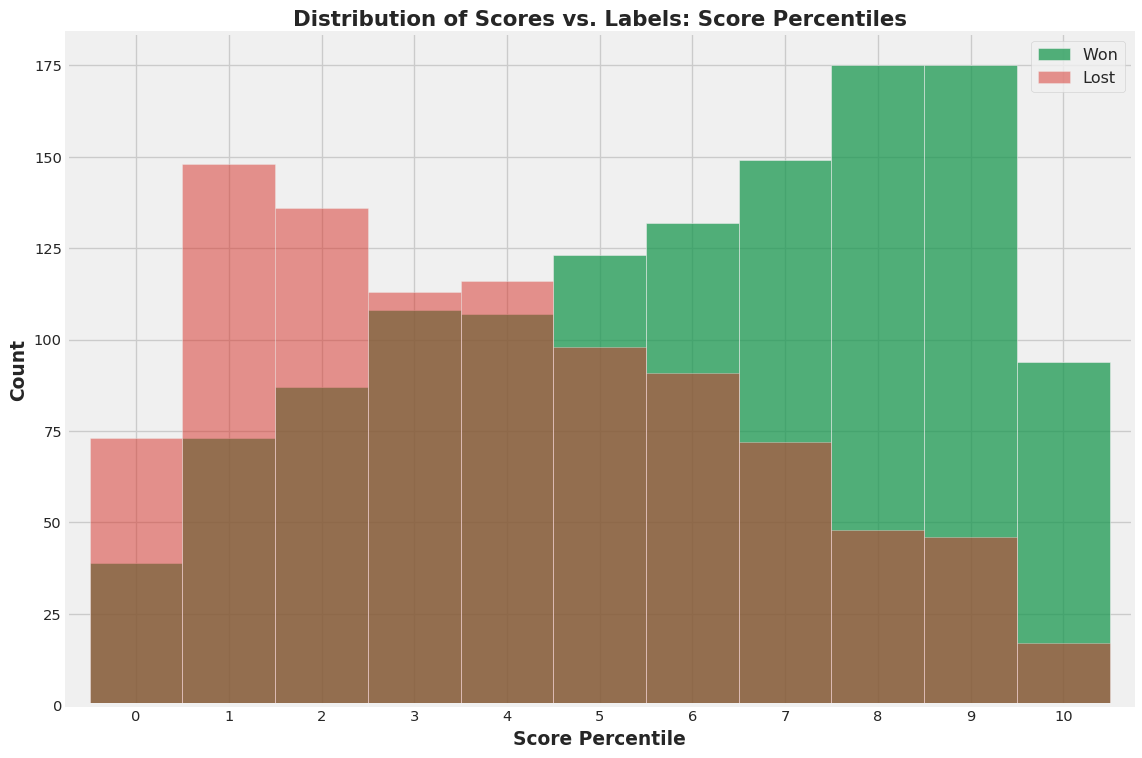

<Figure size 1152x768 with 0 Axes>

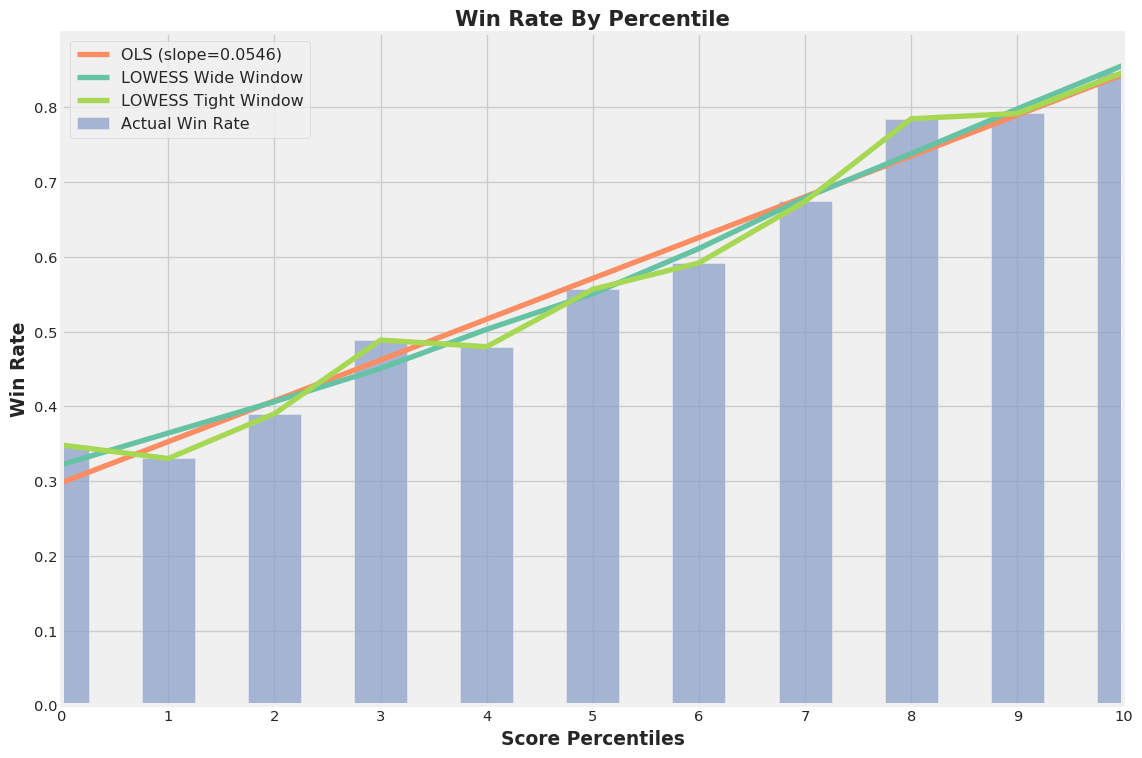

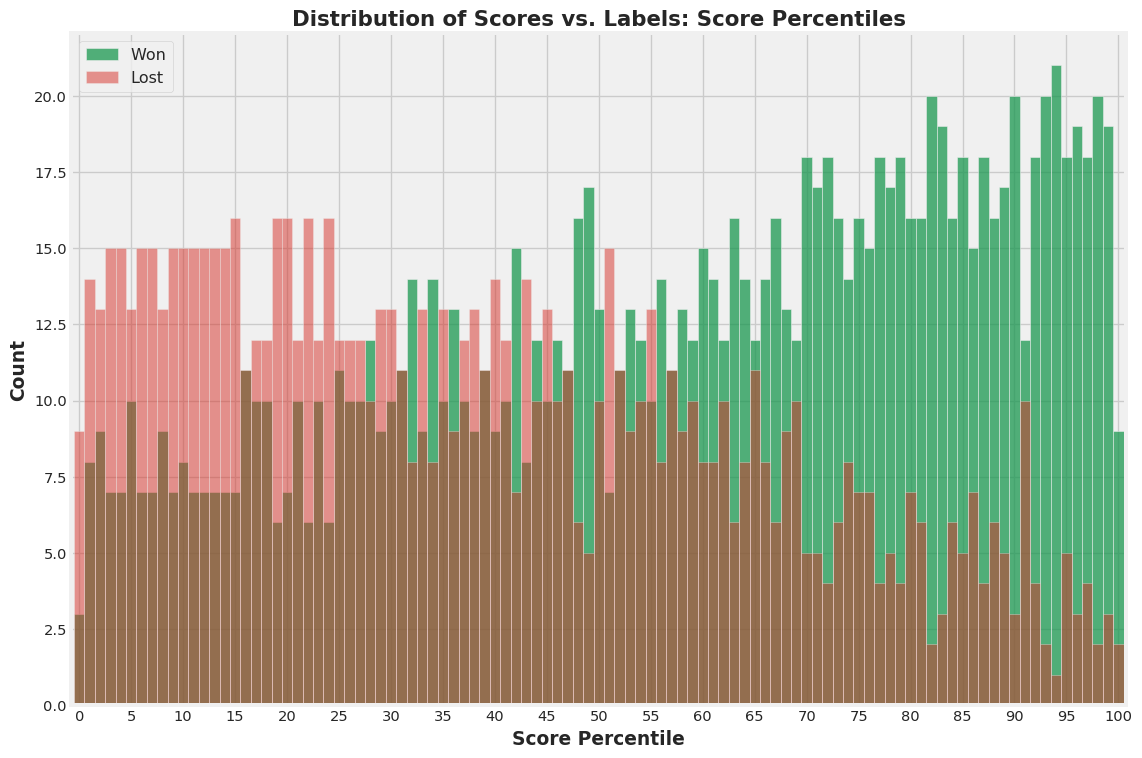

<Figure size 1152x768 with 0 Axes>

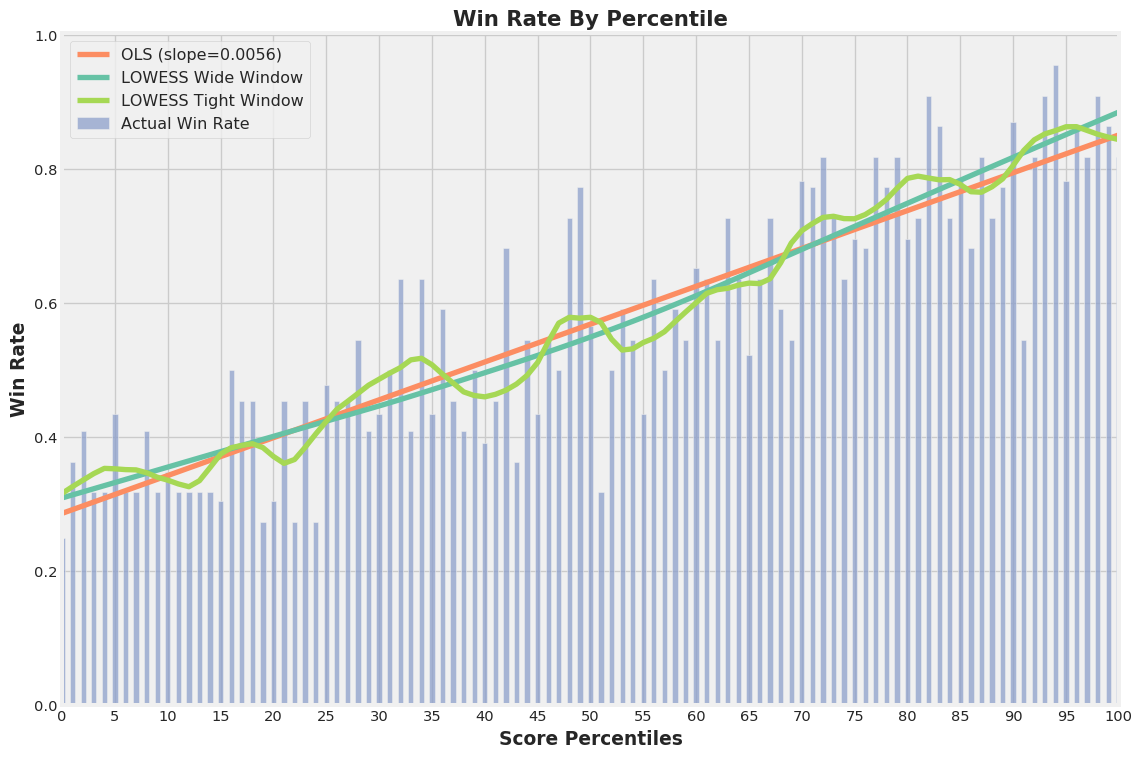

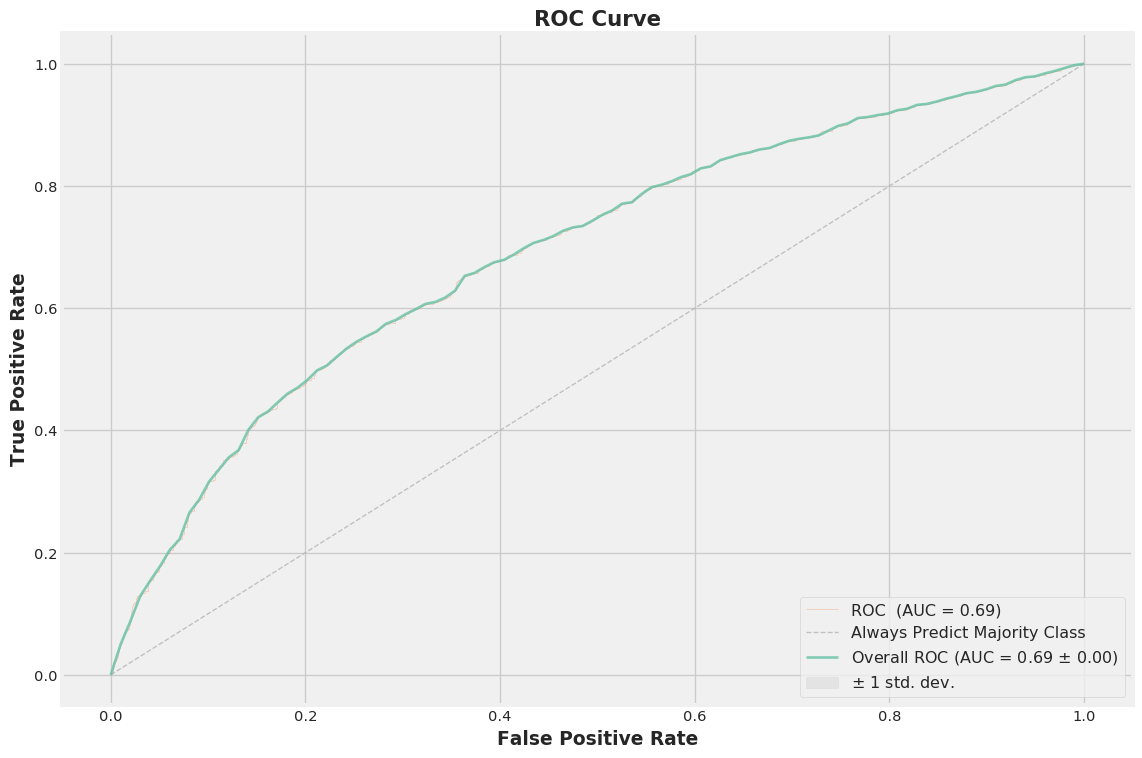

<Figure size 1152x768 with 0 Axes>

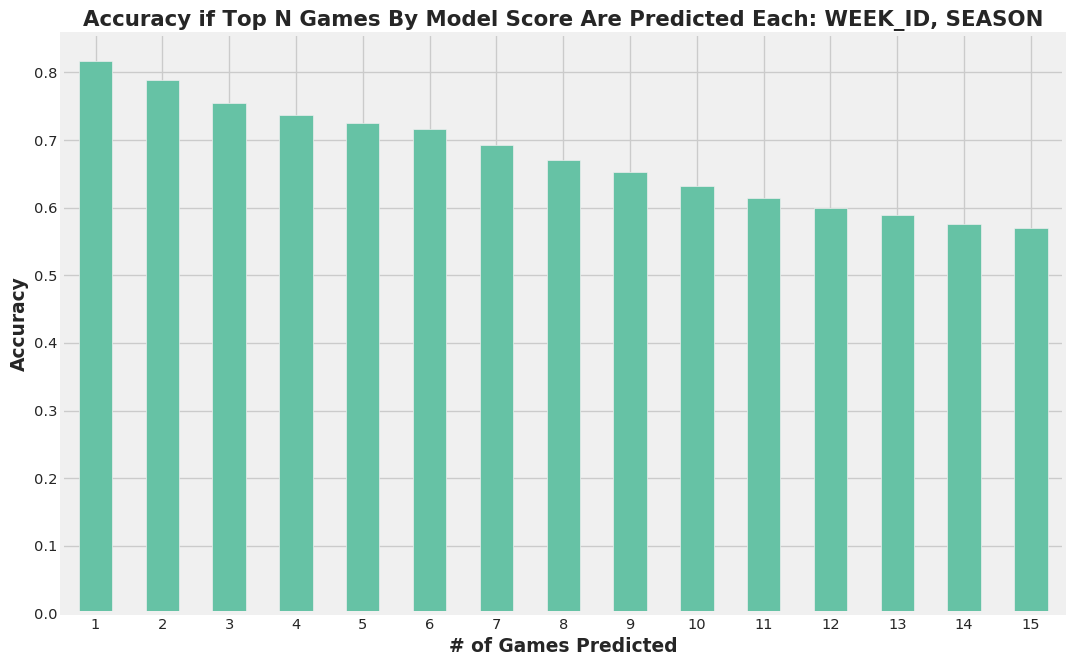

<Figure size 1152x768 with 0 Axes>

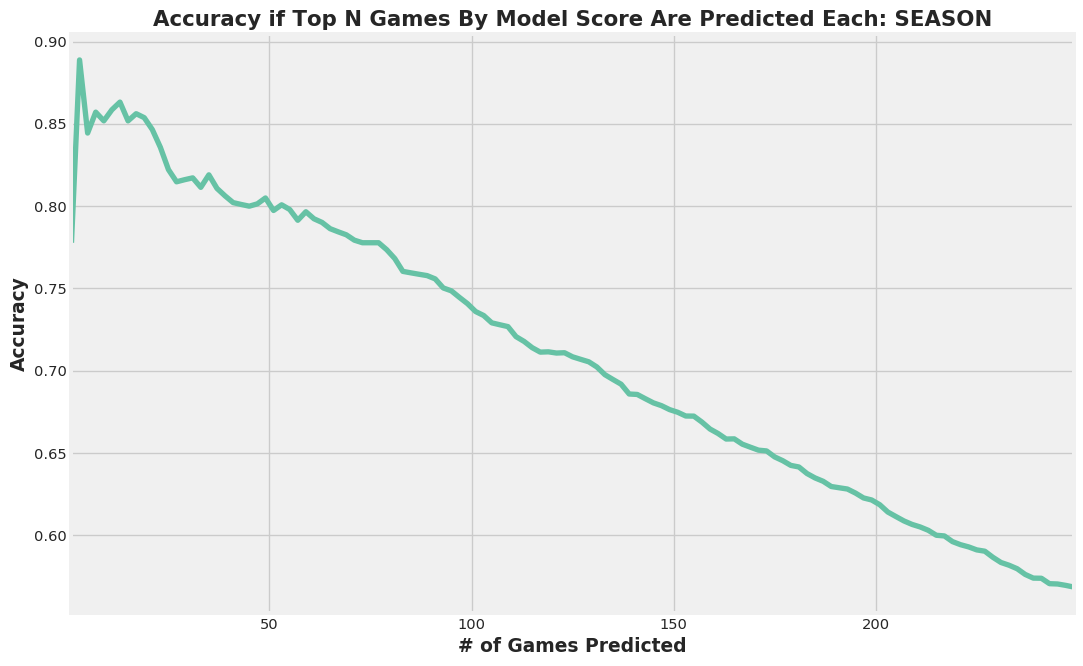

<Figure size 1152x768 with 0 Axes>

In [14]:
# note: reusing the eval JSON above
ensemble = Ensemble(ensemble_model_load_cv_json_path, ensemble_evaluate_json_path)
ensemble.execute_ensemble()
ensemble.evaluate_ensemble()